<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Regresiones%20NO%20Lineales/M%C3%A9xico/M%C3%A9xico_Actividad_3_6_Regresion_NO_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión NO lineal

## Actividad 3.6


## 1.   **Importamos librerías y leemos archivo**


In [148]:
%pip install scipy

In [149]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [150]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [151]:
data=pd.read_csv('Datos_Limpios_iqr(méxico).csv')
data.head()

,Unnamed: 0,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,within an hour,Roma Norte,"['email', 'phone']",t,t,...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,a few days or more,Unknown,"['email', 'phone', 'work_email']",t,t,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,within an hour,Condesa,"['email', 'phone', 'work_email']",t,t,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,within an hour,Unknown,"['email', 'phone']",t,t,...,6.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,1.19
4,4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,within a day,Hipódromo,"['email', 'phone']",t,t,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32


In [152]:
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,within an hour,Roma Norte,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,a few days or more,Unknown,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,within an hour,Condesa,"['email', 'phone', 'work_email']",t,t,Unknown,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,within an hour,Unknown,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,6.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,1.19
4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,within a day,Hipódromo,"['email', 'phone']",t,t,Unknown,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32


##2.   **Realiza** las acciones de preprocesamiento necesarias: **Nulos y Outliers**



In [153]:
print('Total de valores nulos dentro del DF:  ',data.isnull().sum().sum())

Total de valores nulos dentro del DF:   0


In [154]:
#Se crea una copia del frame original
data_copia = data.copy()

In [155]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['host_is_superhost'])

array(['Unknown time', 'a few days or more', 'within a day',
       'within a few hours', 'within an hour'], dtype=object)

In [156]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['room_type'])

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [157]:
#Se reemplazan los datos categoricos a numerico
data_copia['room_type'] = data_copia['room_type'].replace('Entire home/apt',1)
data_copia['room_type'] = data_copia['room_type'].replace('Hotel room',2)
data_copia['room_type'] = data_copia['room_type'].replace('Private room',3)
data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)
data_copia['room_type'] = data_copia['room_type'].astype(int)

<ipython-input-157-09f6cc314ba6>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)


In [158]:
#Se eliminan columnas innecesarias
data_evaluar = data_copia.select_dtypes(include=[int, float])
data_evaluar.head(3)

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,1,898633,4796027,1.0,0.88,3.0,6.0,19.42063,-99.16586,2.0,...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,1,35797,153786,1.0,0.90,1.0,1.0,19.38283,-99.20000,2.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,1,44616,196253,1.0,0.92,17.0,17.0,19.41162,-99.17794,2.9,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42


##3.  **Crear Modelos**

En primer lugar, para facilitar la busqueda de variables que sirvan correctamente como variables independientes para cada modelo se utiliza un 'heat map' el cuál nos muestre las variables con la mejor correlación.

In [159]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_evaluar.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)

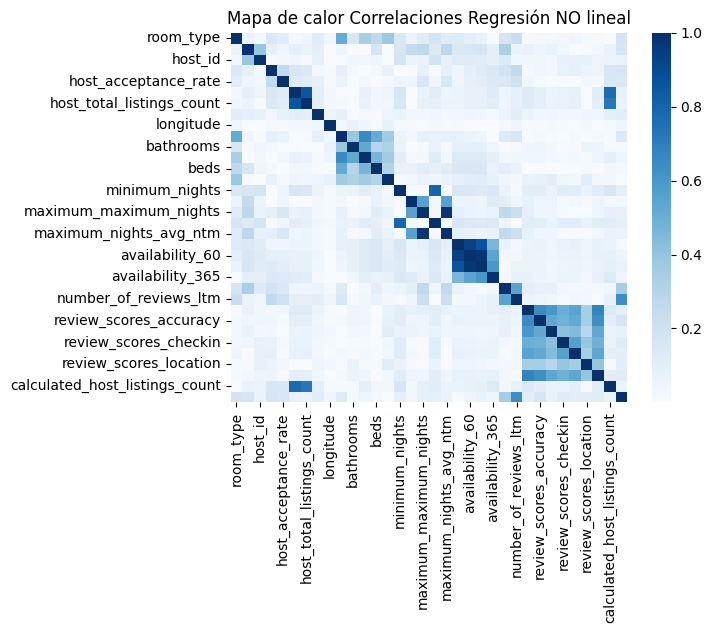

In [160]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Blues')
Heat_Map
plt.title('Mapa de calor Correlaciones Regresión NO lineal')
plt.show()

##  4. **Elegir** 2 modelos de correlación No lineal y **Analizar** la correlación que existe entre las siguientes variables:

1. **host_response_rate** (variable objetivo)
2. **host_acceptance_rate** (variable objetivo)
3. **host_total_listings_count** (variable objetivo)
4. **accommodates** (variable objetivo)
5. **reviews_per_month** (variable objetivo)
6. **price**(variable objetivo)



### host_response_rate

In [161]:
a=corr_factors1.sort_values(by='host_response_rate', ascending=False).head(7)
a.head()

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_response_rate,0.143308,0.086772,0.020389,1.000000,0.260122,0.156221,0.141139,0.022486,0.012962,0.085789,...,0.261699,0.022863,0.036157,0.033220,0.071109,0.089711,0.060827,0.054585,0.144938,0.162499
number_of_reviews_ltm,0.224132,0.060373,0.036642,0.261699,0.198970,0.087737,0.085560,0.098365,0.048750,0.157138,...,1.000000,0.056464,0.052487,0.041834,0.018774,0.032186,0.021014,0.004462,0.072140,0.640267
host_acceptance_rate,0.110336,0.044591,0.028334,0.260122,1.000000,0.127724,0.116840,0.079142,0.012800,0.064611,...,0.198970,0.036264,0.017336,0.010694,0.014150,0.004418,0.030239,0.012229,0.149630,0.146925
number_of_reviews,0.169532,0.332546,0.137801,0.185772,0.143809,0.050796,0.049302,0.058706,0.026903,0.126029,...,0.549655,0.092040,0.076893,0.075214,0.030686,0.016830,0.020869,0.025546,0.034333,0.354004
reviews_per_month,0.179683,0.161820,0.071980,0.162499,0.146925,0.074455,0.067707,0.112063,0.047238,0.137452,...,0.640267,0.098629,0.163638,0.080302,0.121043,0.103259,0.098589,0.114497,0.057164,1.000000


In [162]:
#Variable Independiente
a1=a.index[1]
a1

'number_of_reviews_ltm'

In [163]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_1 = data_evaluar[a1]
var_dep_1 = data_evaluar['host_response_rate']

In [164]:
x=vars_indep_1
y=var_dep_1

### Modelos

#### Modelo 1:

            y = ax^2 + bx + c   ("Función cuadrática")

In [165]:
def  func1 (x, a, b, c):
     return a * np.square(x) + b * x + c

In [166]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1 , vars_indep_1, var_dep_1)

In [167]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-5.21171239e-05,  2.93736813e-03,  9.56765240e-01])

In [168]:
# Predicciones
y_pred1 = func1(x, *parametros1)
y_pred1.head()

,number_of_reviews_ltm
0,0.965108
1,0.956765
2,0.956765
3,0.972513
4,0.967681


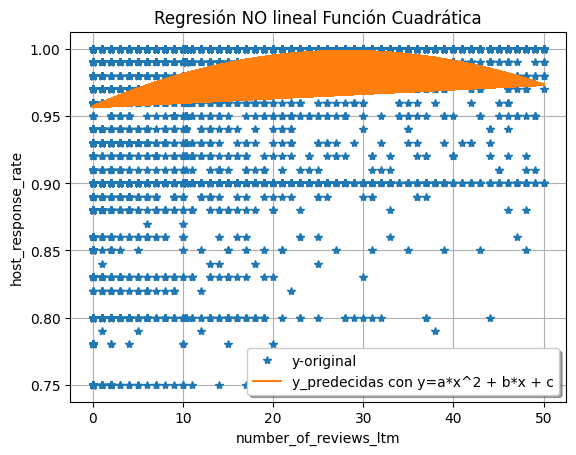

In [169]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred1, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [170]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1= r2_score(y,y_pred1)
R2_Modelo1

0.10121046195548489

In [171]:
#Calculamos el coeficiente de correlacion del modelo
R_1=np.sqrt(R2_Modelo1)
R_1

0.3181359174244318

#### Modelo 2:
            y = a*exp(-bx) + c   ("Función exponencial")


In [172]:
def  func2 (x, a, b, c):
     return a * np.exp(-b * x) + c

In [173]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2 , vars_indep_1, var_dep_1)
# Predicciones
y_pred2 = func2(x, *parametros2)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2= r2_score(y,y_pred2)
#Calculamos el coeficiente de correlacion del modelo
R_2=np.sqrt(R2_Modelo2)

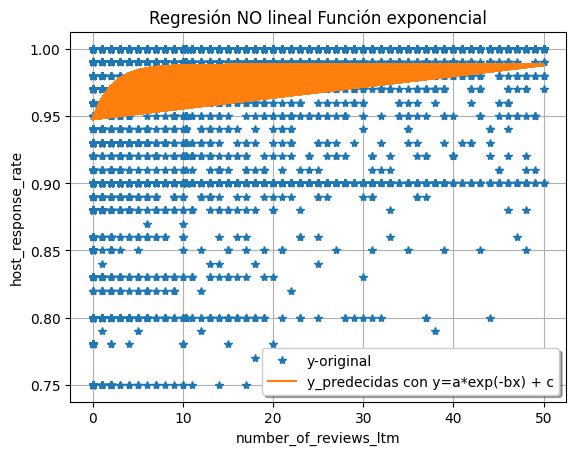

In [174]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred2, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 3:

           y = 1/a*x           ("Función inversa")


In [175]:
def  func3 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3 , vars_indep_1, var_dep_1)
# Predicciones
y_pred3 = func3(x, *parametros3)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3= r2_score(y,y_pred3)
#Calculamos el coeficiente de correlacion del modelo
R_3=np.sqrt(R2_Modelo3)

<ipython-input-175-997376f21c0c>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros3, covs3= curve_fit(func3 , vars_indep_1, var_dep_1)
<ipython-input-175-997376f21c0c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_3=np.sqrt(R2_Modelo3)


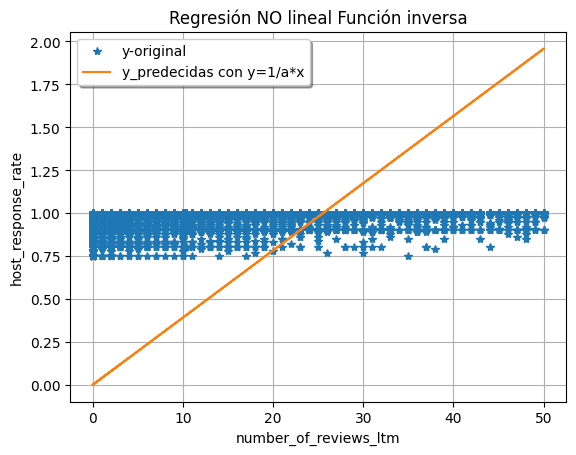

In [176]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred3, label='y_predecidas con y=1/a*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

            y = a*np.sin(x) + b ("Función senoidal")


In [177]:
def  func4 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4 , vars_indep_1, var_dep_1)
# Predicciones
y_pred4 = func4(x, *parametros4)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4= r2_score(y,y_pred4)
#Calculamos el coeficiente de correlacion del modelo
R_4=np.sqrt(R2_Modelo4)

<ipython-input-177-758dc1cdbdf0>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs4= curve_fit(func4 , vars_indep_1, var_dep_1)


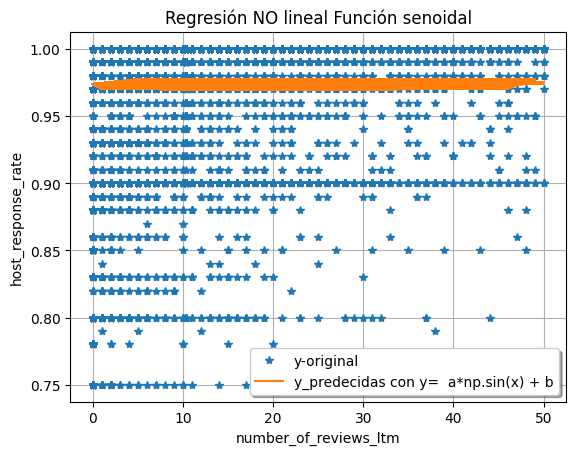

In [178]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred4, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:
            y = a*np.tan(x) + b ("Función tangencial")


In [179]:
def  func5 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros5, covs= curve_fit(func5 , vars_indep_1, var_dep_1)
# Predicciones
y_pred5 = func5(x, *parametros5)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo5= r2_score(y,y_pred5)
#Calculamos el coeficiente de correlacion del modelo
R_5=np.sqrt(R2_Modelo5)

<ipython-input-179-e4edc3a11a66>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros5, covs= curve_fit(func5 , vars_indep_1, var_dep_1)


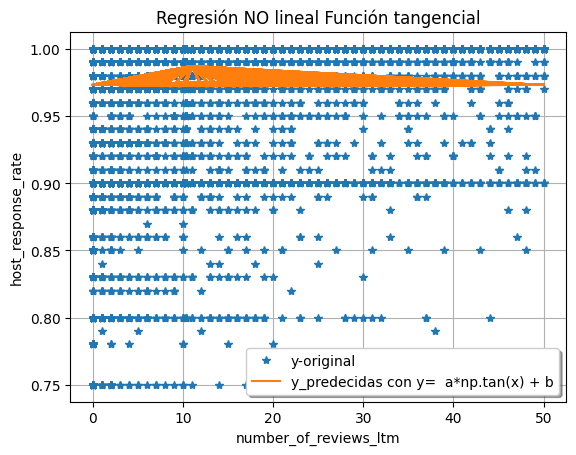

In [180]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred5, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:
            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [181]:
def  func6 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6 , vars_indep_1, var_dep_1)
# Predicciones
y_pred6 = func6(x, *parametros6)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6= r2_score(y,y_pred6)
#Calculamos el coeficiente de correlacion del modelo
R_6=np.sqrt(R2_Modelo6)

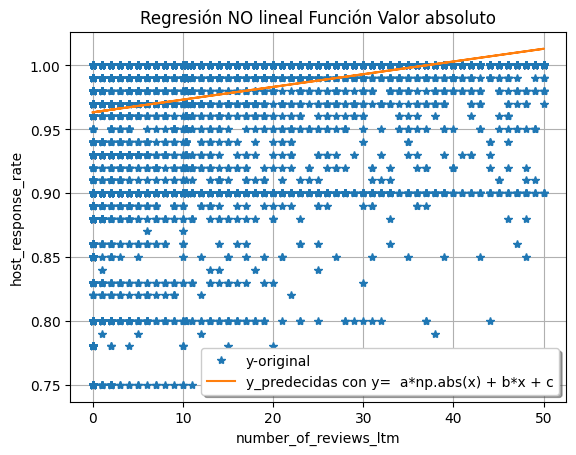

In [182]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred6, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

<ipython-input-183-c97b1b67e608>:11: RuntimeWarning: invalid value encountered in sqrt
  R_7=np.sqrt(R2_Modelo7)


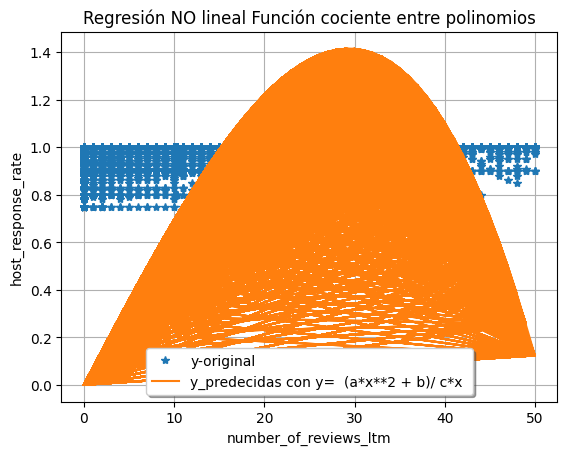

In [183]:
def  func7 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7 , vars_indep_1, var_dep_1)
# Predicciones
y_pred7 = func7(x, *parametros7)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7= r2_score(y,y_pred7)
#Calculamos el coeficiente de correlacion del modelo
R_7=np.sqrt(R2_Modelo7)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred7, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:
            y = a*np.log(x) + b  (Función logaritmica)


In [184]:
#CONTIENE VALORES INFINITOS Y NO SE PUEDE GRAFICAR
'''
def  func8 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros8, covs8= curve_fit(func8 , vars_indep_1, var_dep_1)
# Predicciones
y_pred8 = func8(x, *parametros8)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo8= r2_score(y,y_pred8)
#Calculamos el coeficiente de correlacion del modelo
R_8=np.sqrt(R2_Modelo8)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred8, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func8 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros8, covs8= curve_fit(func8 , vars_indep_1, var_dep_1)\n# Predicciones\ny_pred8 = func8(x, *parametros8)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo8= r2_score(y,y_pred8)\n#Calculamos el coeficiente de correlacion del modelo\nR_8=np.sqrt(R2_Modelo8)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred8, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('number_of_reviews_ltm')\nplt.ylabel('host_response_rate')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9:

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)


<ipython-input-185-3e2c03426643>:11: RuntimeWarning: invalid value encountered in sqrt
  R_9=np.sqrt(R2_Modelo9)


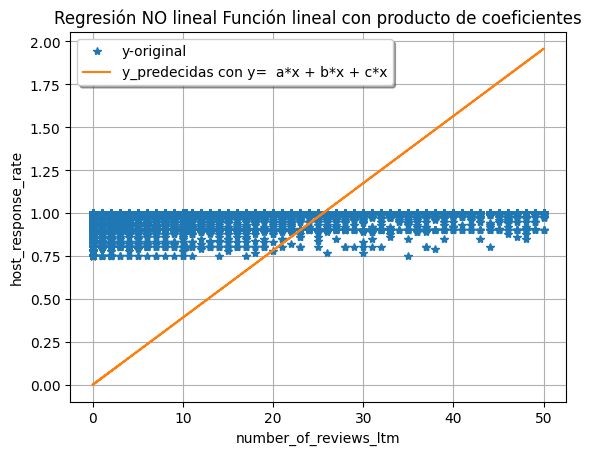

In [185]:
def  func9 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros9, covs8= curve_fit(func9 , vars_indep_1, var_dep_1)
# Predicciones
y_pred9 = func9(x, *parametros9)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo9= r2_score(y,y_pred9)
#Calculamos el coeficiente de correlacion del modelo
R_9=np.sqrt(R2_Modelo9)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred9, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:


            y = 1/a*x**2  (Función cuadrática inversa)


<ipython-input-186-9df0293262d8>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros10, covs10= curve_fit(func10 , vars_indep_1, var_dep_1)
<ipython-input-186-9df0293262d8>:11: RuntimeWarning: invalid value encountered in sqrt
  R_10=np.sqrt(R2_Modelo10)


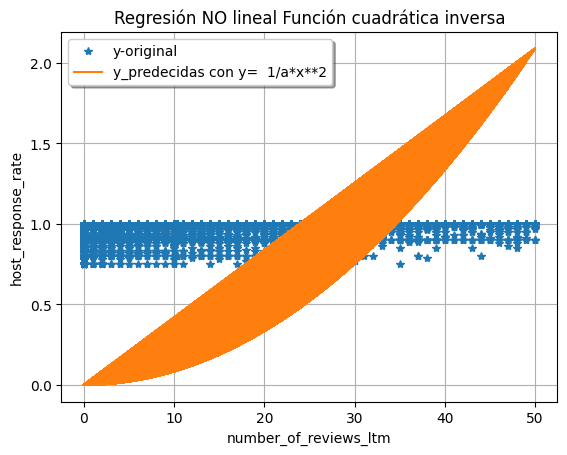

In [186]:
def  func10 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros10, covs10= curve_fit(func10 , vars_indep_1, var_dep_1)
# Predicciones
y_pred10 = func10(x, *parametros10)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo10= r2_score(y,y_pred10)
#Calculamos el coeficiente de correlacion del modelo
R_10=np.sqrt(R2_Modelo10)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred10, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

            y = a/b*x**2 + c*x (Función polinomial inversa)



<ipython-input-187-520c00f0393e>:11: RuntimeWarning: invalid value encountered in sqrt
  R_11=np.sqrt(R2_Modelo11)


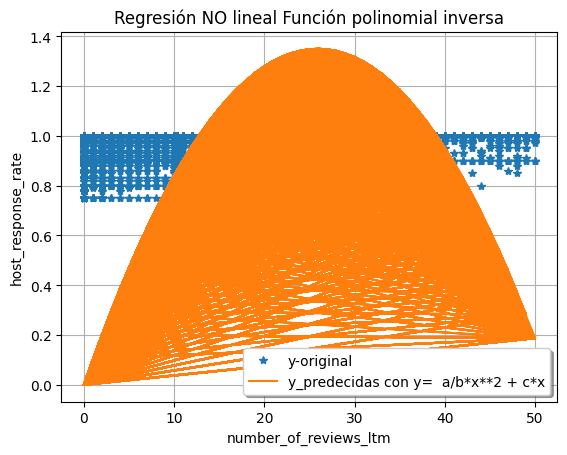

In [187]:
def  func11 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros11, covs11= curve_fit(func11, vars_indep_1, var_dep_1)
# Predicciones
y_pred11 = func11(x, *parametros11)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo11= r2_score(y,y_pred11)
#Calculamos el coeficiente de correlacion del modelo
R_11=np.sqrt(R2_Modelo11)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred11, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES HOST RESPONSE RATE

In [188]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo1, R2_Modelo2,R2_Modelo3,R2_Modelo4,R2_Modelo5,R2_Modelo6,R2_Modelo7,R2_Modelo9,R2_Modelo10,R2_Modelo11],
    'Coeficiente de Correlación': [R_1, R_2,R_3,R_4,R_5,R_6,R_7,R_9,R_10,R_11]
}

# Generar con llaves
df_coef_mult1 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult1 = df_coef_mult1.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult1)
print('\nMejor Modelo:\n', df_coef_mult1.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 2: Función Exponencial                                           0.131490   
Modelo 1: Función Cuadrática                                            0.101210   
Modelo 6: Función Valor absoluto                                        0.068486   
Modelo 4: Función senoidal                                              0.002236   
Modelo 5: Función tangencial                                            0.001490   
Modelo 11: Función polinomial inversa                                -181.620978   
Modelo 7: Función cociente entre polinomios                          -199.841253   
Modelo 3: Función inversa                                            -246.610828   
Modelo 9: Función lineal con producto de coefic...                   -246.610828   
Modelo 10: Función cuadrática inversa                                -329.139328   

         

### host_acceptance_rate

In [189]:
a1=corr_factors1.sort_values(by='host_acceptance_rate', ascending=False).head(7)
a1.head()

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_acceptance_rate,0.110336,0.044591,0.028334,0.260122,1.000000,0.127724,0.116840,0.079142,0.012800,0.064611,...,0.198970,0.036264,0.017336,0.010694,0.014150,0.004418,0.030239,0.012229,0.149630,0.146925
host_response_rate,0.143308,0.086772,0.020389,1.000000,0.260122,0.156221,0.141139,0.022486,0.012962,0.085789,...,0.261699,0.022863,0.036157,0.033220,0.071109,0.089711,0.060827,0.054585,0.144938,0.162499
number_of_reviews_ltm,0.224132,0.060373,0.036642,0.261699,0.198970,0.087737,0.085560,0.098365,0.048750,0.157138,...,1.000000,0.056464,0.052487,0.041834,0.018774,0.032186,0.021014,0.004462,0.072140,0.640267
maximum_maximum_nights,0.116069,0.275901,0.071456,0.086898,0.156032,0.065028,0.075598,0.021496,0.005864,0.079247,...,0.220526,0.082663,0.046241,0.048655,0.012643,0.004828,0.007587,0.046786,0.084479,0.076478
calculated_host_listings_count,0.003758,0.068626,0.058460,0.144938,0.149630,0.774474,0.723919,0.094867,0.019090,0.009183,...,0.072140,0.137783,0.103891,0.072661,0.071752,0.094632,0.014647,0.107546,1.000000,0.057164


In [190]:
#Variable Independiente
a2=a1.index[1]
a2

'host_response_rate'

In [191]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_2 = data_evaluar[a2]
var_dep_2 = data_evaluar['host_acceptance_rate']

### Modelos:

#### Modelo 1:

<ipython-input-192-c4c1a395c482>:10: RuntimeWarning: invalid value encountered in sqrt
  R_12=np.sqrt(R2_Modelo12)


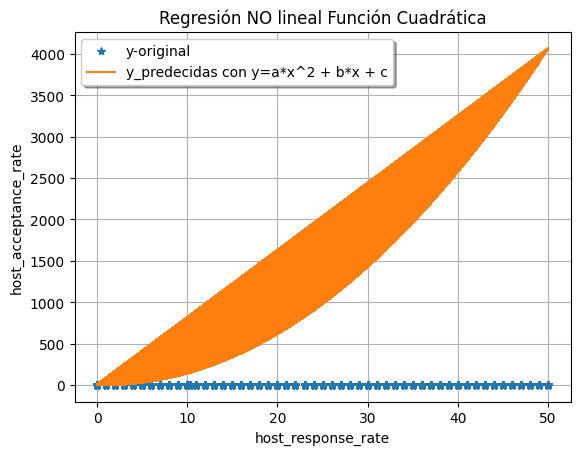

In [192]:
def  func12 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros12, covs= curve_fit(func12 , vars_indep_2, var_dep_2)
# Predicciones
y_pred12 = func12(x, *parametros12)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo12= r2_score(y,y_pred12)
#Calculamos el coeficiente de correlacion del modelo
R_12=np.sqrt(R2_Modelo12)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred12, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

In [193]:
#NO PUDO OPTIMIZAR EL MODELO
'''
def  func22 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros22, covs= curve_fit(func22 , vars_indep_2, var_dep_2)
# Predicciones
y_pred22 = func22(x, *parametros22)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo22= r2_score(y,y_pred22)
#Calculamos el coeficiente de correlacion del modelo
R_22=np.sqrt(R2_Modelo22)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred22, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func22 (x, a, b, c):\n     return a * np.exp(-b * x) + c\n\n#Ajustamos los parámetros de la función curve_fit\nparametros22, covs= curve_fit(func22 , vars_indep_2, var_dep_2)\n# Predicciones\ny_pred22 = func22(x, *parametros22)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo22= r2_score(y,y_pred22)\n#Calculamos el coeficiente de correlacion del modelo\nR_22=np.sqrt(R2_Modelo22)\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred22, label='y_predecidas con y=a*exp(-bx) + c')\nplt.xlabel('host_response_rate')\nplt.ylabel('host_acceptance_rate')\nplt.title('Regresión NO lineal Función exponencial')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 3

<ipython-input-194-0b90c51bba71>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros32, covs3= curve_fit(func32 , vars_indep_2, var_dep_2)
<ipython-input-194-0b90c51bba71>:11: RuntimeWarning: invalid value encountered in sqrt
  R_32=np.sqrt(R2_Modelo32)


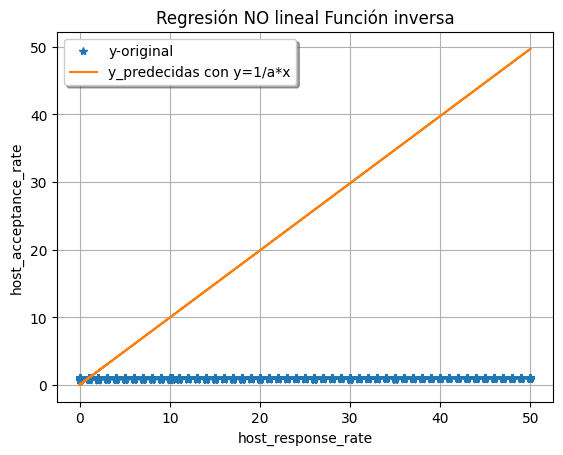

In [194]:
def  func32 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros32, covs3= curve_fit(func32 , vars_indep_2, var_dep_2)
# Predicciones
y_pred32 = func32(x, *parametros32)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo32= r2_score(y,y_pred32)
#Calculamos el coeficiente de correlacion del modelo
R_32=np.sqrt(R2_Modelo32)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred32, label='y_predecidas con y=1/a*x')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4

<ipython-input-195-8f98241a63ca>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros42, covs4= curve_fit(func42 , vars_indep_2, var_dep_2)
<ipython-input-195-8f98241a63ca>:11: RuntimeWarning: invalid value encountered in sqrt
  R_42=np.sqrt(R2_Modelo42)


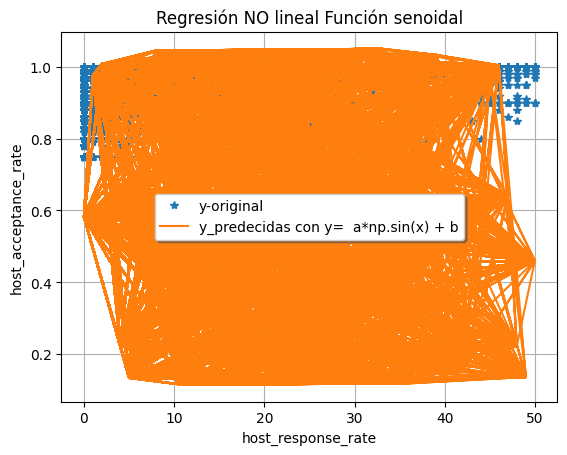

In [195]:
def  func42 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros42, covs4= curve_fit(func42 , vars_indep_2, var_dep_2)
# Predicciones
y_pred42 = func42(x, *parametros42)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo42= r2_score(y,y_pred42)
#Calculamos el coeficiente de correlacion del modelo
R_42=np.sqrt(R2_Modelo42)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred42, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5

<ipython-input-196-b272beed4d73>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros52, covs= curve_fit(func52 , vars_indep_2, var_dep_2)
<ipython-input-196-b272beed4d73>:11: RuntimeWarning: invalid value encountered in sqrt
  R_52=np.sqrt(R2_Modelo52)


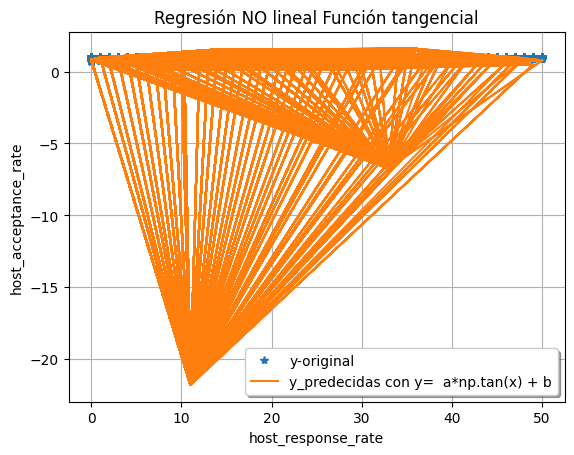

In [196]:
def  func52 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros52, covs= curve_fit(func52 , vars_indep_2, var_dep_2)
# Predicciones
y_pred52 = func52(x, *parametros52)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo52= r2_score(y,y_pred52)
#Calculamos el coeficiente de correlacion del modelo
R_52=np.sqrt(R2_Modelo52)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred52, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6

<ipython-input-197-212b9055f5e7>:11: RuntimeWarning: invalid value encountered in sqrt
  R_62=np.sqrt(R2_Modelo62)


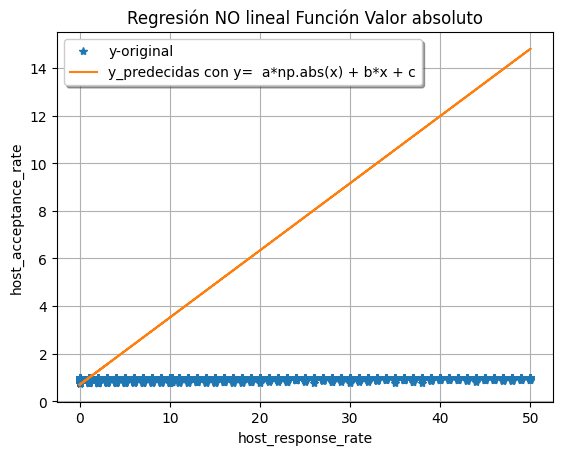

In [197]:
def  func62 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros62, covs62= curve_fit(func62 , vars_indep_2, var_dep_2)
# Predicciones
y_pred62 = func62(x, *parametros62)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo62= r2_score(y,y_pred62)
#Calculamos el coeficiente de correlacion del modelo
R_62=np.sqrt(R2_Modelo62)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred62, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7

<ipython-input-198-323652bf0c4d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_72=np.sqrt(R2_Modelo72)


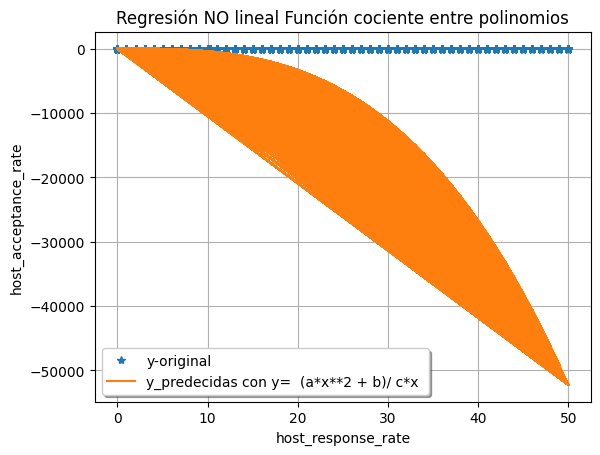

In [198]:
def  func72 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros72, covs72= curve_fit(func72 , vars_indep_2, var_dep_2)
# Predicciones
y_pred72 = func72(x, *parametros72)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo72= r2_score(y,y_pred72)
#Calculamos el coeficiente de correlacion del modelo
R_72=np.sqrt(R2_Modelo72)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred72, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8

In [199]:
#EL MODELO CONTIENE VALORES INFINITOS
'''
def  func82 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros82, covs82= curve_fit(func82 , vars_indep_2, var_dep_2)
# Predicciones
y_pred82 = func82(x, *parametros82)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo82= r2_score(y,y_pred82)
#Calculamos el coeficiente de correlacion del modelo
R_82=np.sqrt(R2_Modelo82)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred82, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func82 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros82, covs82= curve_fit(func82 , vars_indep_2, var_dep_2)\n# Predicciones\ny_pred82 = func82(x, *parametros82)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo82= r2_score(y,y_pred82)\n#Calculamos el coeficiente de correlacion del modelo\nR_82=np.sqrt(R2_Modelo82)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred82, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('host_response_rate')\nplt.ylabel('host_acceptance_rate')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9

<ipython-input-200-53d8eddb3ebf>:11: RuntimeWarning: invalid value encountered in sqrt
  R_92=np.sqrt(R2_Modelo92)


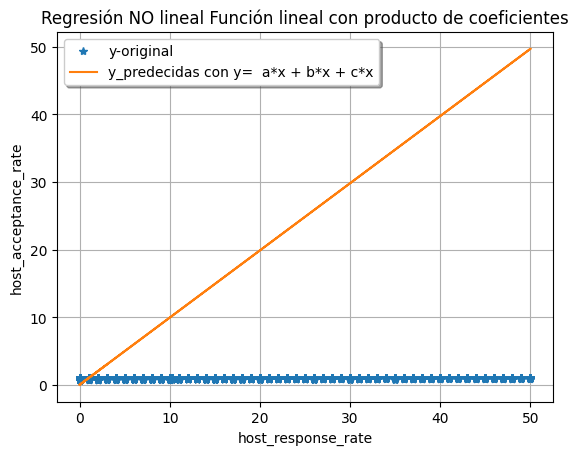

In [200]:
def  func92 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros92, covs92= curve_fit(func92 , vars_indep_2, var_dep_2)
# Predicciones
y_pred92 = func92(x, *parametros92)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo92= r2_score(y,y_pred92)
#Calculamos el coeficiente de correlacion del modelo
R_92=np.sqrt(R2_Modelo92)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred92, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10

<ipython-input-201-95ddfd50c1ed>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros102, covs102= curve_fit(func102 , vars_indep_2, var_dep_2)
<ipython-input-201-95ddfd50c1ed>:11: RuntimeWarning: invalid value encountered in sqrt
  R_102=np.sqrt(R2_Modelo102)


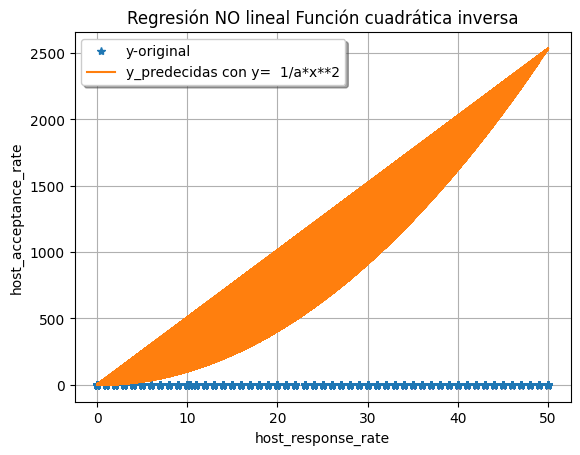

In [201]:
def  func102 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros102, covs102= curve_fit(func102 , vars_indep_2, var_dep_2)
# Predicciones
y_pred102 = func102(x, *parametros102)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo102= r2_score(y,y_pred102)
#Calculamos el coeficiente de correlacion del modelo
R_102=np.sqrt(R2_Modelo102)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred102, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11

<ipython-input-202-bfa3527e725c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_112=np.sqrt(R2_Modelo112)


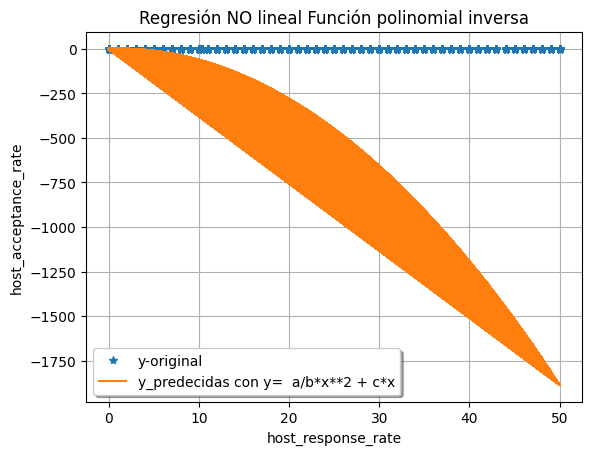

In [202]:
def  func112 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros112, covs112= curve_fit(func112, vars_indep_2, var_dep_2)
# Predicciones
y_pred112 = func112(x, *parametros112)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo112= r2_score(y,y_pred112)
#Calculamos el coeficiente de correlacion del modelo
R_112=np.sqrt(R2_Modelo112)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred112, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_response_rate')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_acceptance_rate

In [203]:
# Preparar datos del Frame
coef_data2 = {
    'Coeficiente de Determinación': [R2_Modelo12, R2_Modelo32, R2_Modelo42, R2_Modelo52, R2_Modelo62, R2_Modelo72, R2_Modelo92, R2_Modelo102, R2_Modelo112],
    'Coeficiente de Correlación': [R_12, R_32, R_42, R_52, R_62, R_72, R_92, R_102, R_112]
}

# Generar con llaves
df_coef_mult2 = pd.DataFrame(coef_data2, index=['Modelo 1: Función Cuadrática','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult2 = df_coef_mult2.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones host_acceptance_rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult2)
print('\nMejor Modelo:\n', df_coef_mult2.iloc[0])

Tabla de correlaciones host_acceptance_rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 4: Función senoidal                                         -1.018122e+02   
Modelo 5: Función tangencial                                       -4.095730e+03   
Modelo 6: Función Valor absoluto                                   -8.581944e+03   
Modelo 9: Función lineal con producto de coefic...                 -1.068592e+05   
Modelo 3: Función inversa                                          -1.068592e+05   
Modelo 11: Función polinomial inversa                              -7.644586e+07   
Modelo 10: Función cuadrática inversa                              -1.419840e+08   
Modelo 1: Función Cuadrática                                       -3.572672e+08   
Modelo 7: Función cociente entre polinomios                        -3.918322e+10   

                                                    Coeficiente de Correlación  
Modelo 4: 

### host_total_listings_count

In [204]:
a=corr_factors1.sort_values(by='host_total_listings_count', ascending=False).head(7)
a.head()

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_total_listings_count,0.035912,0.067955,0.005015,0.141139,0.116840,0.858556,1.000000,0.095149,0.024695,0.013042,...,0.085560,0.124837,0.097589,0.064681,0.070999,0.082244,0.007520,0.097126,0.723919,0.067707
host_listings_count,0.024078,0.083132,0.047704,0.156221,0.127724,1.000000,0.858556,0.098647,0.025417,0.008030,...,0.087737,0.124631,0.097128,0.061139,0.072374,0.080128,0.004200,0.100192,0.774474,0.074455
calculated_host_listings_count,0.003758,0.068626,0.058460,0.144938,0.149630,0.774474,0.723919,0.094867,0.019090,0.009183,...,0.072140,0.137783,0.103891,0.072661,0.071752,0.094632,0.014647,0.107546,1.000000,0.057164
minimum_nights,0.149008,0.153120,0.177934,0.000238,0.051142,0.161155,0.144630,0.059738,0.018172,0.057583,...,0.013463,0.100047,0.101838,0.067692,0.115859,0.116108,0.066108,0.112531,0.167904,0.085492
host_response_rate,0.143308,0.086772,0.020389,1.000000,0.260122,0.156221,0.141139,0.022486,0.012962,0.085789,...,0.261699,0.022863,0.036157,0.033220,0.071109,0.089711,0.060827,0.054585,0.144938,0.162499


In [205]:
#Variable Independiente
a2=a.index[1]
a2

'host_listings_count'

In [206]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[a2]
var_dep_3 = data_evaluar['host_total_listings_count']

### Modelos:

#### Modelo 1:

<ipython-input-207-2b86039615ff>:10: RuntimeWarning: invalid value encountered in sqrt
  R_13=np.sqrt(R2_Modelo13)


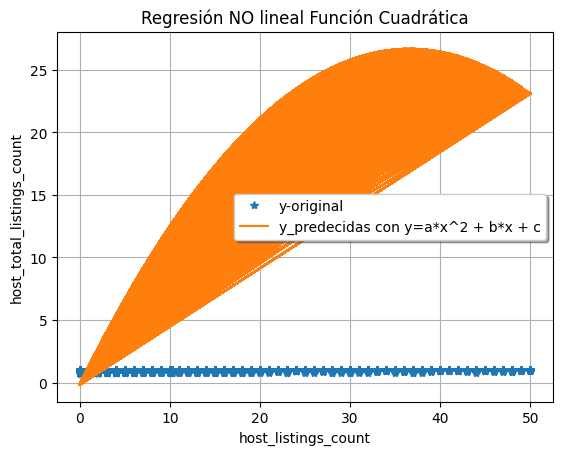

In [207]:
def  func13 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)
# Predicciones
y_pred13 = func13(x, *parametros13)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo13= r2_score(y,y_pred13)
#Calculamos el coeficiente de correlacion del modelo
R_13=np.sqrt(R2_Modelo13)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred13, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

<ipython-input-208-47c2d7f779eb>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3)
<ipython-input-208-47c2d7f779eb>:11: RuntimeWarning: invalid value encountered in sqrt
  R_23=np.sqrt(R2_Modelo23)


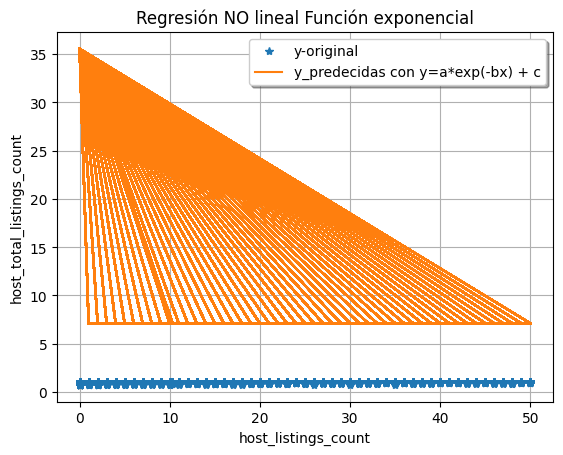

In [208]:
def  func23 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3)
# Predicciones
y_pred23 = func23(x, *parametros23)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo23= r2_score(y,y_pred23)
#Calculamos el coeficiente de correlacion del modelo
R_23=np.sqrt(R2_Modelo23)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### Modelo 3:

<ipython-input-209-efc386f4e5b5>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
<ipython-input-209-efc386f4e5b5>:11: RuntimeWarning: invalid value encountered in sqrt
  R_33=np.sqrt(R2_Modelo33)


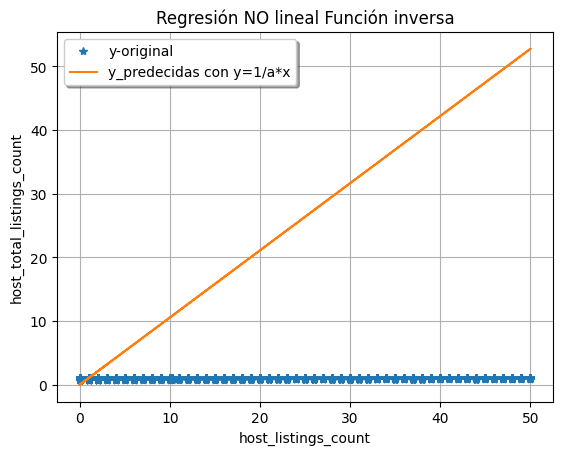

In [209]:
def  func33 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
# Predicciones
y_pred33 = func33(x, *parametros33)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo33= r2_score(y,y_pred33)
#Calculamos el coeficiente de correlacion del modelo
R_33=np.sqrt(R2_Modelo33)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred33, label='y_predecidas con y=1/a*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

<ipython-input-210-065bcbecb521>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
<ipython-input-210-065bcbecb521>:11: RuntimeWarning: invalid value encountered in sqrt
  R_43=np.sqrt(R2_Modelo43)


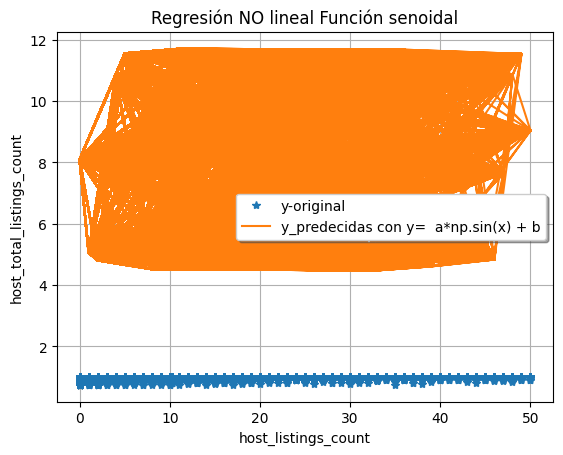

In [210]:
def  func43 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
# Predicciones
y_pred43 = func43(x, *parametros43)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo43= r2_score(y,y_pred43)
#Calculamos el coeficiente de correlacion del modelo
R_43=np.sqrt(R2_Modelo43)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred43, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:

<ipython-input-211-ae544f9e27d0>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
<ipython-input-211-ae544f9e27d0>:11: RuntimeWarning: invalid value encountered in sqrt
  R_53=np.sqrt(R2_Modelo53)


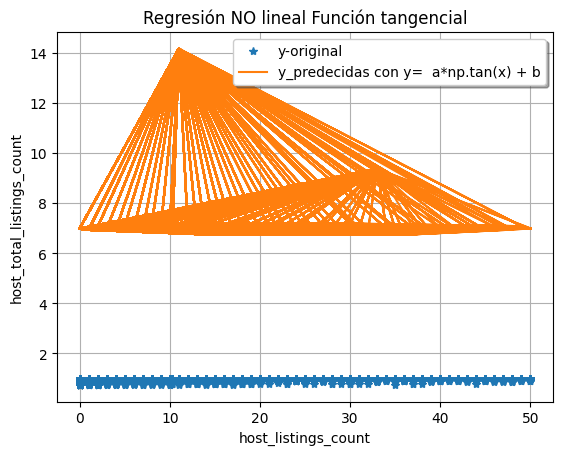

In [211]:
def  func53 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
# Predicciones
y_pred53 = func53(x, *parametros53)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo53= r2_score(y,y_pred53)
#Calculamos el coeficiente de correlacion del modelo
R_53=np.sqrt(R2_Modelo53)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred53, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:

<ipython-input-212-37aae273805c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_63=np.sqrt(R2_Modelo63)


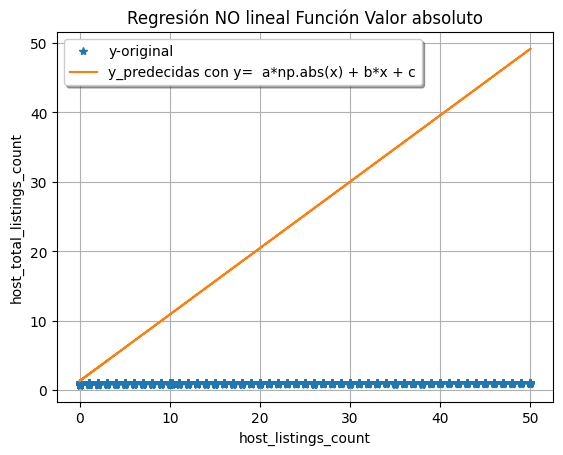

In [212]:
def  func63 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)
# Predicciones
y_pred63 = func63(x, *parametros63)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo63= r2_score(y,y_pred63)
#Calculamos el coeficiente de correlacion del modelo
R_63=np.sqrt(R2_Modelo63)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred63, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

<ipython-input-213-0bb25371ee68>:11: RuntimeWarning: invalid value encountered in sqrt
  R_73=np.sqrt(R2_Modelo73)


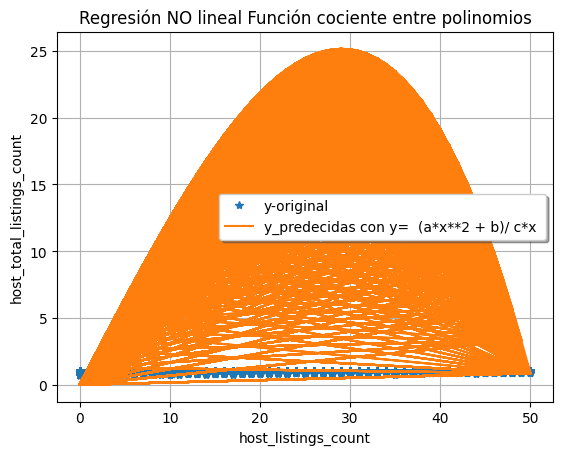

In [213]:
def  func73 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)
# Predicciones
y_pred73 = func73(x, *parametros73)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo73= r2_score(y,y_pred73)
#Calculamos el coeficiente de correlacion del modelo
R_73=np.sqrt(R2_Modelo73)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred73, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:

In [214]:
#EL MODELO CONTIENE VALORES INFINITOS
'''
def  func83 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)
# Predicciones
y_pred83 = func83(x, *parametros83)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo83= r2_score(y,y_pred83)
#Calculamos el coeficiente de correlacion del modelo
R_83=np.sqrt(R2_Modelo83)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func83 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)\n# Predicciones\ny_pred83 = func83(x, *parametros83)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo83= r2_score(y,y_pred83)\n#Calculamos el coeficiente de correlacion del modelo\nR_83=np.sqrt(R2_Modelo83)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('host_listings_count')\nplt.ylabel('host_total_listings_count')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9:

<ipython-input-215-be51d422a3c3>:11: RuntimeWarning: invalid value encountered in sqrt
  R_93=np.sqrt(R2_Modelo93)


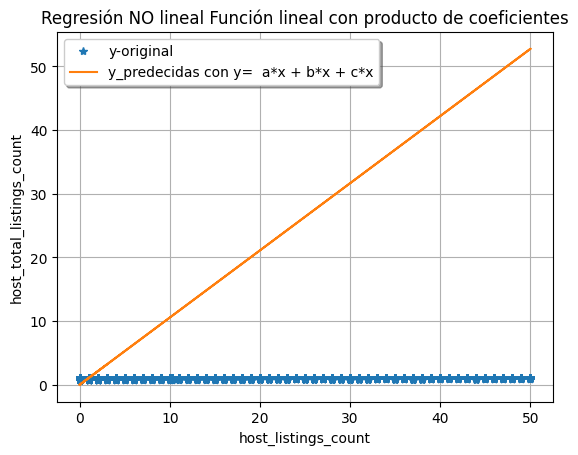

In [215]:
def  func93 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros93, covs93= curve_fit(func93 , vars_indep_3, var_dep_3)
# Predicciones
y_pred93 = func93(x, *parametros93)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo93= r2_score(y,y_pred93)
#Calculamos el coeficiente de correlacion del modelo
R_93=np.sqrt(R2_Modelo93)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred93, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:

<ipython-input-216-928b26dc646d>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
<ipython-input-216-928b26dc646d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_103=np.sqrt(R2_Modelo103)


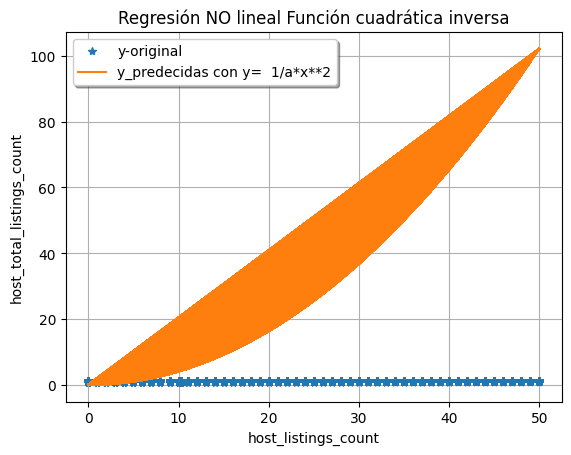

In [216]:
def  func103 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
# Predicciones
y_pred103 = func103(x, *parametros103)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo103= r2_score(y,y_pred103)
#Calculamos el coeficiente de correlacion del modelo
R_103=np.sqrt(R2_Modelo103)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred103, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

<ipython-input-217-52d4026ee79c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_113=np.sqrt(R2_Modelo113)


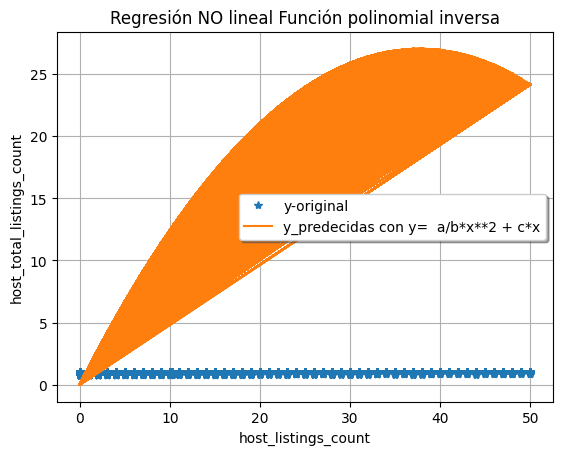

In [217]:
def  func113(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)
# Predicciones
y_pred113 = func113(x, *parametros113)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo113= r2_score(y,y_pred113)
#Calculamos el coeficiente de correlacion del modelo
R_113=np.sqrt(R2_Modelo113)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_total_listings_count

In [218]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo13, R2_Modelo23,R2_Modelo33,R2_Modelo43,R2_Modelo53,R2_Modelo63,R2_Modelo73,R2_Modelo93,R2_Modelo103,R2_Modelo113],
    'Coeficiente de Correlación': [R_13, R_23,R_33,R_43,R_53,R_63,R_73,R_93,R_103,R_113]
}

# Generar con llaves
df_coef_mult3 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult3 = df_coef_mult3.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones host_total_listings_count REGRESIÓN NO MULTIPLE\n\n', df_coef_mult3)
print('\nMejor Modelo:\n', df_coef_mult3.iloc[0])

Tabla de correlaciones host_total_listings_count REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 5: Función tangencial                                       -17352.109200   
Modelo 4: Función senoidal                                         -24205.629631   
Modelo 7: Función cociente entre polinomios                        -64042.356991   
Modelo 1: Función Cuadrática                                       -74971.985934   
Modelo 11: Función polinomial inversa                              -75742.809880   
Modelo 6: Función Valor absoluto                                  -110010.974970   
Modelo 3: Función inversa                                         -120909.563421   
Modelo 9: Función lineal con producto de coefic...                -120909.564158   
Modelo 2: Función Exponencial                                     -156881.509335   
Modelo 10: Función cuadrática inversa                             -222409.774122   

  

### accommodates

In [219]:
a=corr_factors1.sort_values(by='accommodates', ascending=False).head(7)
a.head()

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
accommodates,0.511978,0.044850,0.006936,0.085789,0.064611,0.008030,0.013042,0.084599,0.032688,1.000000,...,0.157138,0.007642,0.027249,0.007179,0.002241,0.024016,0.008263,0.024456,0.009183,0.137452
bedrooms,0.340784,0.000005,0.031265,0.000111,0.022336,0.076040,0.064190,0.012937,0.048461,0.654592,...,0.041158,0.038207,0.042564,0.022314,0.016120,0.027205,0.018927,0.048629,0.090940,0.046726
beds,0.268154,0.165891,0.044854,0.026906,0.002127,0.030453,0.031544,0.013974,0.011463,0.518633,...,0.069156,0.000108,0.009743,0.002914,0.001965,0.010600,0.015186,0.006311,0.034081,0.020950
room_type,1.000000,0.057425,0.025434,0.143308,0.110336,0.024078,0.035912,0.111291,0.041726,0.511978,...,0.224132,0.014486,0.026417,0.024928,0.033348,0.044627,0.017250,0.019089,0.003758,0.179683
bathrooms,0.152665,0.005338,0.035678,0.025625,0.008845,0.009880,0.001239,0.003217,0.069808,0.389795,...,0.013189,0.049038,0.046187,0.031215,0.009179,0.013989,0.055119,0.051244,0.009061,0.016022


In [220]:
#Variable Independiente
a3=a.index[1]
a3

'bedrooms'

In [221]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_4 = data_evaluar[a3]
var_dep_4 = data_evaluar['accommodates']

### Modelos:

#### Modelo 1:

<ipython-input-222-35a2f1ceb3d5>:10: RuntimeWarning: invalid value encountered in sqrt
  R_200=np.sqrt(R2_Modelo200)


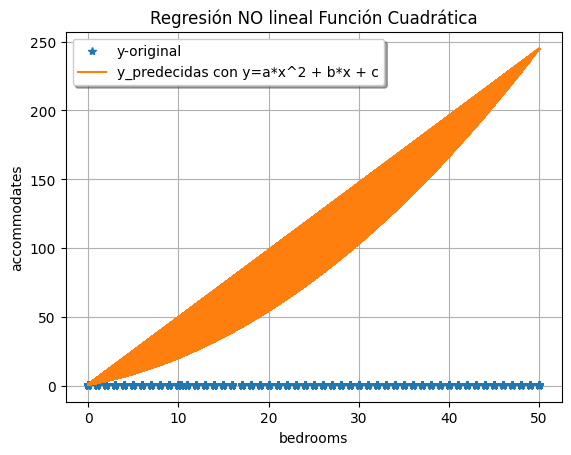

In [222]:
def  func200 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros200, covs= curve_fit(func200 , vars_indep_4, var_dep_4)
# Predicciones
y_pred200 = func200(x, *parametros200)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo200= r2_score(y,y_pred200)
#Calculamos el coeficiente de correlacion del modelo
R_200=np.sqrt(R2_Modelo200)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred200, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

 #### Modelo 2:

In [223]:
#NO PUDO OPRTIMIZAR EL MODELO
'''
def  func210 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros210, covs= curve_fit(func210 , vars_indep_4, var_dep_4)
# Predicciones
y_pred210 = func210(x, *parametros210)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo210= r2_score(y,y_pred210)
#Calculamos el coeficiente de correlacion del modelo
R2_Modelo210=np.sqrt(R2_Modelo210)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func210 (x, a, b, c):\n     return a * np.exp(-b * x) + c\n\n#Ajustamos los parámetros de la función curve_fit\nparametros210, covs= curve_fit(func210 , vars_indep_4, var_dep_4)\n# Predicciones\ny_pred210 = func210(x, *parametros210)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo210= r2_score(y,y_pred210)\n#Calculamos el coeficiente de correlacion del modelo\nR2_Modelo210=np.sqrt(R2_Modelo210)\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')\nplt.xlabel('bedrooms') \nplt.ylabel('accommodates')\nplt.title('Regresión NO lineal Función exponencial')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 3:

<ipython-input-224-7cf49eabab36>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros220, covs= curve_fit(func220 , vars_indep_4, var_dep_4)
<ipython-input-224-7cf49eabab36>:11: RuntimeWarning: invalid value encountered in sqrt
  R_220=np.sqrt(R2_Modelo220)


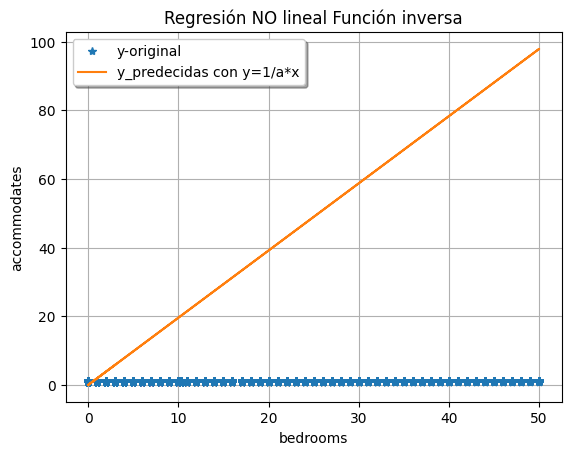

In [224]:
def  func220 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros220, covs= curve_fit(func220 , vars_indep_4, var_dep_4)
# Predicciones
y_pred220 = func220(x, *parametros220)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo220= r2_score(y,y_pred220)
#Calculamos el coeficiente de correlacion del modelo
R_220=np.sqrt(R2_Modelo220)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred220, label='y_predecidas con y=1/a*x')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

<ipython-input-225-2c0f85741bf4>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros230, covs230= curve_fit(func230 , vars_indep_4, var_dep_4)
<ipython-input-225-2c0f85741bf4>:11: RuntimeWarning: invalid value encountered in sqrt
  R_230=np.sqrt(R2_Modelo230)


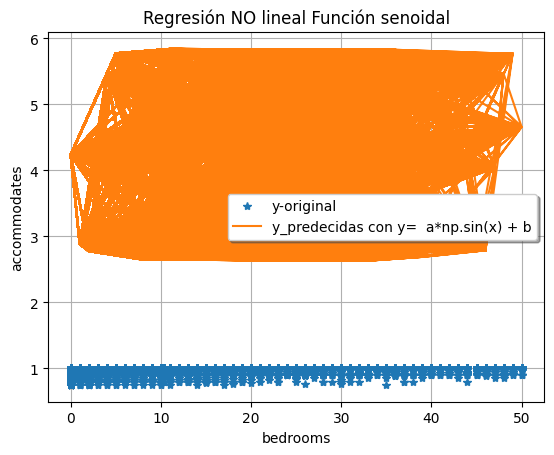

In [225]:
def  func230 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros230, covs230= curve_fit(func230 , vars_indep_4, var_dep_4)
# Predicciones
y_pred230 = func230(x, *parametros230)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo230= r2_score(y,y_pred230)
#Calculamos el coeficiente de correlacion del modelo
R_230=np.sqrt(R2_Modelo230)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred230, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:

<ipython-input-226-b41a02cf05a6>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros240, covs240= curve_fit(func240 , vars_indep_4, var_dep_4)
<ipython-input-226-b41a02cf05a6>:11: RuntimeWarning: invalid value encountered in sqrt
  R_240=np.sqrt(R2_Modelo240)


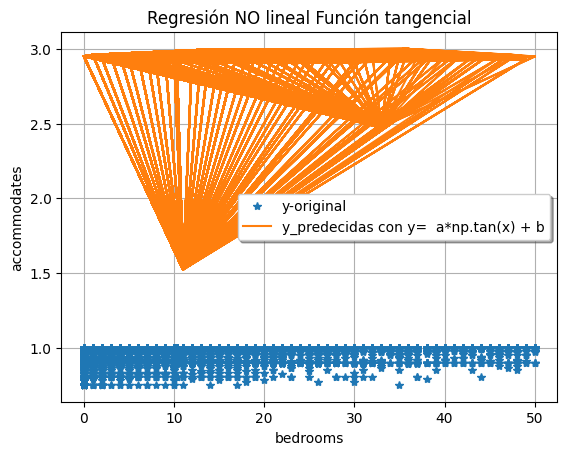

In [226]:
def  func240 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros240, covs240= curve_fit(func240 , vars_indep_4, var_dep_4)
# Predicciones
y_pred240 = func240(x, *parametros240)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo240= r2_score(y,y_pred240)
#Calculamos el coeficiente de correlacion del modelo
R_240=np.sqrt(R2_Modelo240)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred240, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:

<ipython-input-227-f8894a0d8c86>:11: RuntimeWarning: invalid value encountered in sqrt
  R_250=np.sqrt(R2_Modelo250)


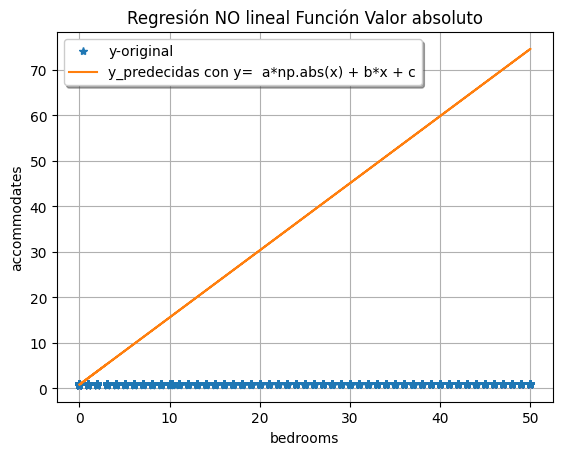

In [227]:
def  func250 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros250, covs250= curve_fit(func250 , vars_indep_4, var_dep_4)
# Predicciones
y_pred250 = func250(x, *parametros250)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo250= r2_score(y,y_pred250)
#Calculamos el coeficiente de correlacion del modelo
R_250=np.sqrt(R2_Modelo250)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred250, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

<ipython-input-228-5920bea84f90>:11: RuntimeWarning: invalid value encountered in sqrt
  R_260=np.sqrt(R2_Modelo260)


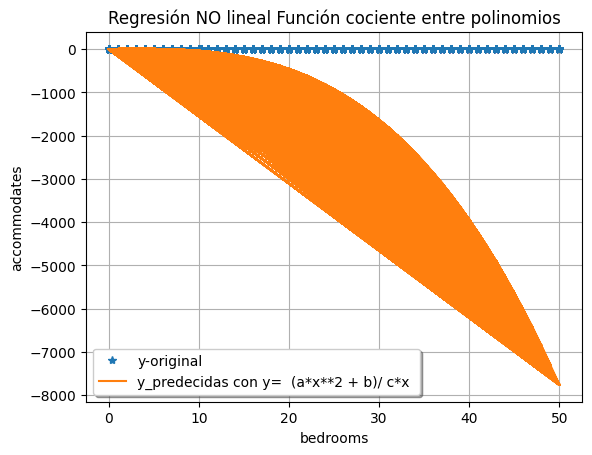

In [228]:
def  func260 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros260, covs260= curve_fit(func260 , vars_indep_4, var_dep_4)
# Predicciones
y_pred260 = func260(x, *parametros260)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo260= r2_score(y,y_pred260)
#Calculamos el coeficiente de correlacion del modelo
R_260=np.sqrt(R2_Modelo260)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred260, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:

In [229]:
#EL MODELO CONTIENE VALORES INFINITOS
'''
def  func270 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros270, covs270= curve_fit(func270 , vars_indep_4, var_dep_4)
# Predicciones
y_pred270 = func270(x, *parametros270)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo270= r2_score(y,y_pred270)
#Calculamos el coeficiente de correlacion del modelo
R_270=np.sqrt(R2_Modelo270)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred270, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func270 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros270, covs270= curve_fit(func270 , vars_indep_4, var_dep_4)\n# Predicciones\ny_pred270 = func270(x, *parametros270)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo270= r2_score(y,y_pred270)\n#Calculamos el coeficiente de correlacion del modelo\nR_270=np.sqrt(R2_Modelo270) \n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred270, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('bedrooms')\nplt.ylabel('accommodates')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show()\n"

#### Modelo 9:

<ipython-input-230-f5570abccece>:11: RuntimeWarning: invalid value encountered in sqrt
  R_280=np.sqrt(R2_Modelo280)


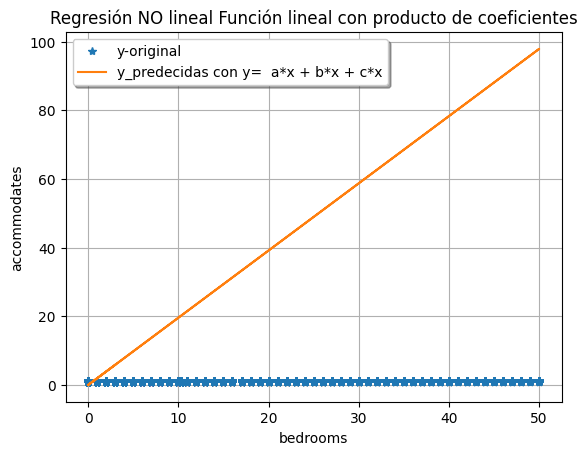

In [230]:
def  func280 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros280, covs280= curve_fit(func280 , vars_indep_4, var_dep_4)
# Predicciones
y_pred280 = func280(x, *parametros280)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo280= r2_score(y,y_pred280)
#Calculamos el coeficiente de correlacion del modelo
R_280=np.sqrt(R2_Modelo280)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred280, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:

<ipython-input-231-49fa01f523b6>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros290, covs290= curve_fit(func290 , vars_indep_4, var_dep_4)
<ipython-input-231-49fa01f523b6>:11: RuntimeWarning: invalid value encountered in sqrt
  R_290=np.sqrt(R2_Modelo290)


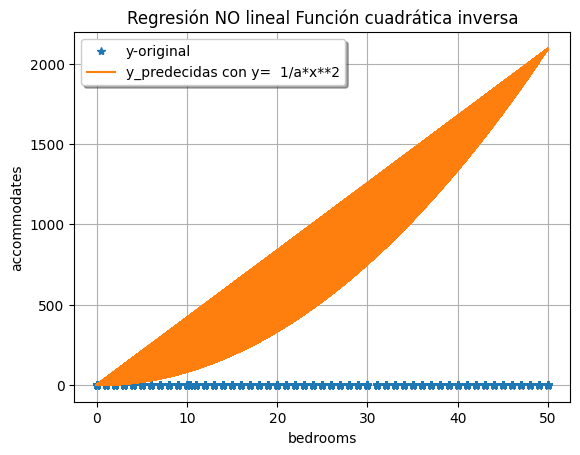

In [231]:
def  func290 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros290, covs290= curve_fit(func290 , vars_indep_4, var_dep_4)
# Predicciones
y_pred290 = func290(x, *parametros290)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo290= r2_score(y,y_pred290)
#Calculamos el coeficiente de correlacion del modelo
R_290=np.sqrt(R2_Modelo290)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred290, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

<ipython-input-232-4cfc7d2748a8>:11: RuntimeWarning: invalid value encountered in sqrt
  R_300=np.sqrt(R2_Modelo300)


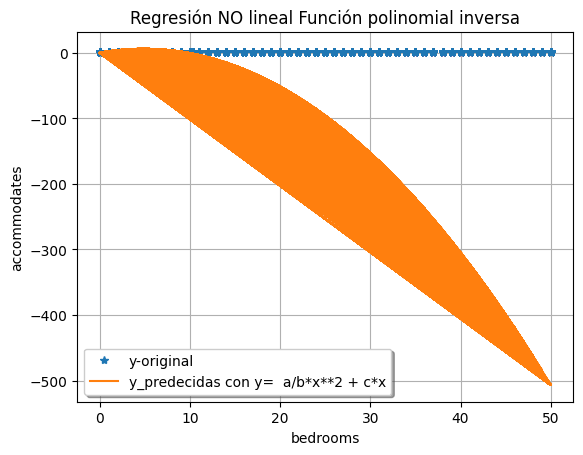

In [232]:
def  func300(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros300, covs300= curve_fit(func300, vars_indep_4, var_dep_4)
# Predicciones
y_pred300 = func300(x, *parametros300)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo300= r2_score(y,y_pred300)
#Calculamos el coeficiente de correlacion del modelo
R_300=np.sqrt(R2_Modelo300)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred300, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Tabla de COEFICIENTES accommodates

In [249]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo200,R2_Modelo220,R2_Modelo230,R2_Modelo240,R2_Modelo250,R2_Modelo260,R2_Modelo280,R2_Modelo290,R2_Modelo300],
    'Coeficiente de Correlación': [R_200,R_220,R_230,R_240,R_250,R_260,R_280,R_290,R_300]
}

# Generar con llaves
df_coef_mult4 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult4 = df_coef_mult4.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones accommodates REGRESIÓN NO MULTIPLE\n\n', df_coef_mult4)
print('\nMejor Modelo:\n', df_coef_mult4.iloc[0])

Tabla de correlaciones accommodates REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 5: Función tangencial                                       -1.725109e+03   
Modelo 4: Función senoidal                                         -5.066325e+03   
Modelo 6: Función Valor absoluto                                   -2.525410e+05   
Modelo 3: Función inversa                                          -4.305518e+05   
Modelo 9: Función lineal con producto de coefic...                 -4.305518e+05   
Modelo 1: Función Cuadrática                                       -1.590683e+06   
Modelo 11: Función polinomial inversa                              -4.848653e+06   
Modelo 10: Función cuadrática inversa                              -9.680928e+07   
Modelo 7: Función cociente entre polinomios                        -8.527911e+08   

                                                    Coeficiente de Correlación  
Modelo 5: Función 

### reviews_per_month

In [234]:
a=corr_factors1.sort_values(by='reviews_per_month', ascending=False).head(7)
a.head()

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
reviews_per_month,0.179683,0.161820,0.071980,0.162499,0.146925,0.074455,0.067707,0.112063,0.047238,0.137452,...,0.640267,0.098629,0.163638,0.080302,0.121043,0.103259,0.098589,0.114497,0.057164,1.000000
number_of_reviews_ltm,0.224132,0.060373,0.036642,0.261699,0.198970,0.087737,0.085560,0.098365,0.048750,0.157138,...,1.000000,0.056464,0.052487,0.041834,0.018774,0.032186,0.021014,0.004462,0.072140,0.640267
number_of_reviews,0.169532,0.332546,0.137801,0.185772,0.143809,0.050796,0.049302,0.058706,0.026903,0.126029,...,0.549655,0.092040,0.076893,0.075214,0.030686,0.016830,0.020869,0.025546,0.034333,0.354004
room_type,1.000000,0.057425,0.025434,0.143308,0.110336,0.024078,0.035912,0.111291,0.041726,0.511978,...,0.224132,0.014486,0.026417,0.024928,0.033348,0.044627,0.017250,0.019089,0.003758,0.179683
review_scores_accuracy,0.026417,0.045223,0.041780,0.036157,0.017336,0.097128,0.097589,0.037435,0.017593,0.027249,...,0.052487,0.647521,1.000000,0.526692,0.486144,0.522181,0.349802,0.636502,0.103891,0.163638


In [235]:
#Variable Independiente
a4=a.index[1]
a4

'number_of_reviews_ltm'

In [236]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_5 = data_evaluar[a4]
var_dep_5 = data_evaluar['reviews_per_month']

#### Modelo 1




<ipython-input-237-5935938689fe>:10: RuntimeWarning: invalid value encountered in sqrt
  R_310=np.sqrt(R2_Modelo310)


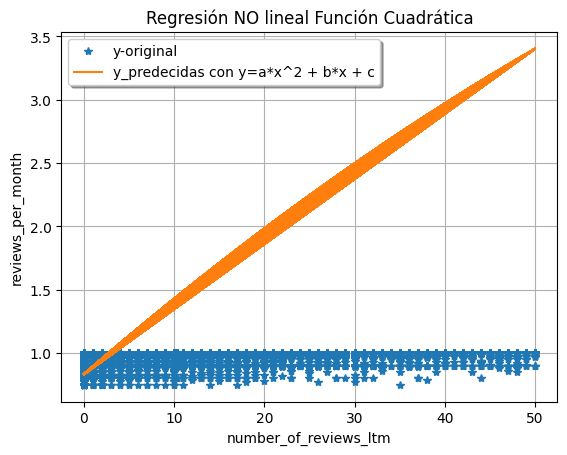

In [237]:
def  func310 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros310, covs310= curve_fit(func310 , vars_indep_5, var_dep_5)
# Predicciones
y_pred310 = func310(x, *parametros310)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo310= r2_score(y,y_pred310)
#Calculamos el coeficiente de correlacion del modelo
R_310=np.sqrt(R2_Modelo310)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred310, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-238-f2fee987990c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_320=np.sqrt(R2_Modelo320)


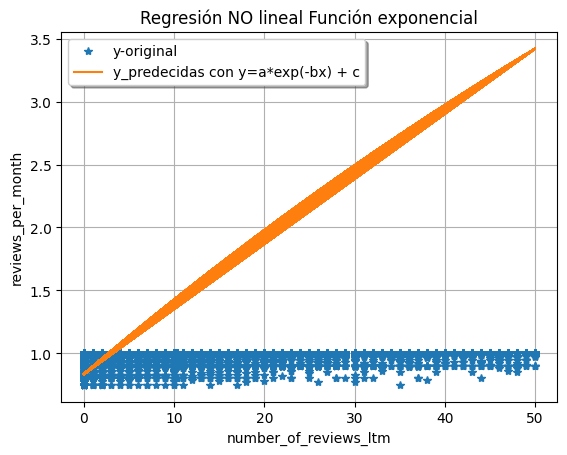

In [238]:
def  func320 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros320, covs320= curve_fit(func320 , vars_indep_5, var_dep_5)
# Predicciones
y_pred320 = func320(x, *parametros320)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo320= r2_score(y,y_pred320)
#Calculamos el coeficiente de correlacion del modelo
R_320=np.sqrt(R2_Modelo320)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred320, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 3

<ipython-input-239-36f148fdb4f8>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros330, covs330= curve_fit(func330 , vars_indep_5, var_dep_5)
<ipython-input-239-36f148fdb4f8>:11: RuntimeWarning: invalid value encountered in sqrt
  R_330=np.sqrt(R2_Modelo330)


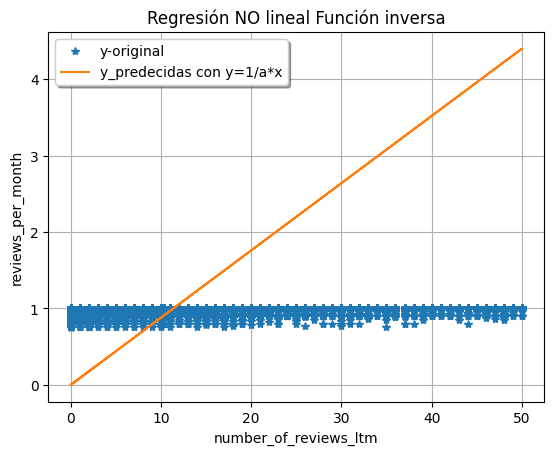

In [239]:
def  func330 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros330, covs330= curve_fit(func330 , vars_indep_5, var_dep_5)
# Predicciones
y_pred330 = func330(x, *parametros330)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo330= r2_score(y,y_pred330)
#Calculamos el coeficiente de correlacion del modelo
R_330=np.sqrt(R2_Modelo330)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred330, label='y_predecidas con y=1/a*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4

<ipython-input-240-550166cb29be>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros340, covs340= curve_fit(func340 , vars_indep_5, var_dep_5)
<ipython-input-240-550166cb29be>:11: RuntimeWarning: invalid value encountered in sqrt
  R_340=np.sqrt(R2_Modelo340)


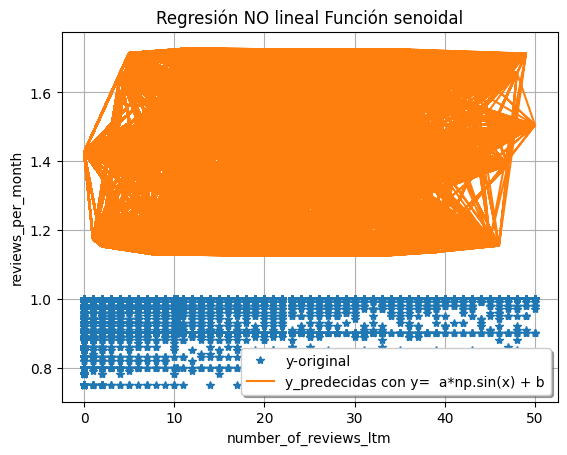

In [240]:
def  func340 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros340, covs340= curve_fit(func340 , vars_indep_5, var_dep_5)
# Predicciones
y_pred340 = func340(x, *parametros340)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo340= r2_score(y,y_pred340)
#Calculamos el coeficiente de correlacion del modelo
R_340=np.sqrt(R2_Modelo340)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred340, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5

<ipython-input-241-786381999eb8>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros350, covs350= curve_fit(func350 , vars_indep_5, var_dep_5)
<ipython-input-241-786381999eb8>:11: RuntimeWarning: invalid value encountered in sqrt
  R_350=np.sqrt(R2_Modelo350)


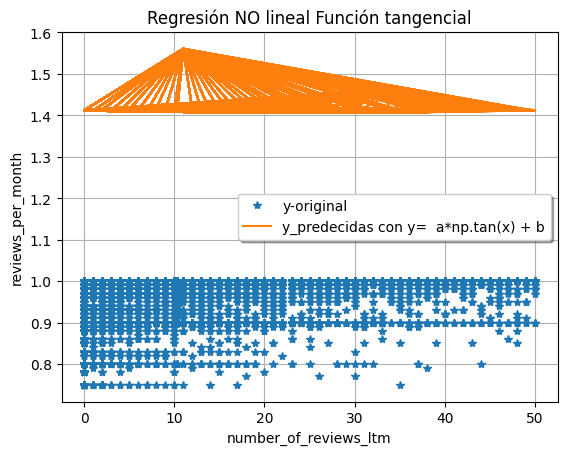

In [241]:
def  func350 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros350, covs350= curve_fit(func350 , vars_indep_5, var_dep_5)
# Predicciones
y_pred350 = func350(x, *parametros350)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo350= r2_score(y,y_pred350)
#Calculamos el coeficiente de correlacion del modelo
R_350=np.sqrt(R2_Modelo350)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred350, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6

<ipython-input-242-d1bc350e3000>:11: RuntimeWarning: invalid value encountered in sqrt
  R_360=np.sqrt(R2_Modelo360)


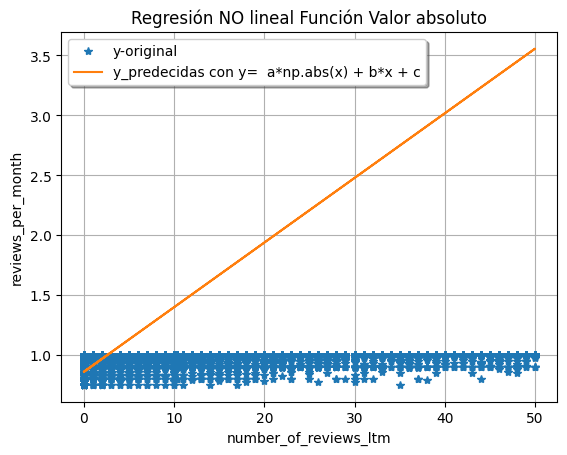

In [242]:
def  func360 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros360, covs360= curve_fit(func360 , vars_indep_5, var_dep_5)
# Predicciones
y_pred360 = func360(x, *parametros360)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo360= r2_score(y,y_pred360)
#Calculamos el coeficiente de correlacion del modelo
R_360=np.sqrt(R2_Modelo360)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred360, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7

<ipython-input-243-d98a84e08610>:11: RuntimeWarning: invalid value encountered in sqrt
  R_370=np.sqrt(R2_Modelo370)


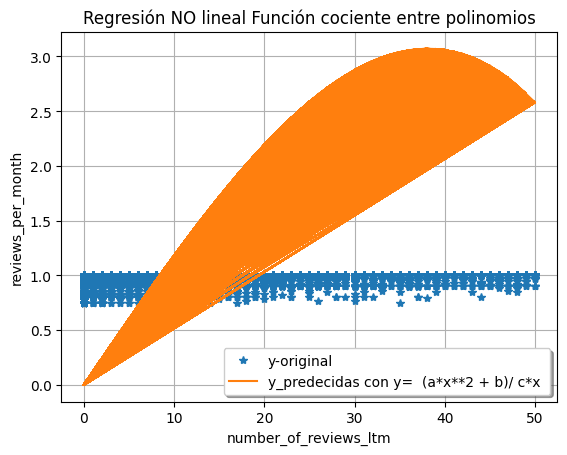

In [243]:
def  func370 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros370, covs370= curve_fit(func370 , vars_indep_5, var_dep_5)
# Predicciones
y_pred370 = func370(x, *parametros370)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo370= r2_score(y,y_pred370)
#Calculamos el coeficiente de correlacion del modelo
R_370=np.sqrt(R2_Modelo370)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred370, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8

In [244]:
#EL MODELO CONTIENE VALORES INFINITOS
'''
def  func380 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros380, covs380= curve_fit(func380 , vars_indep_5, var_dep_5)
# Predicciones
y_pred380 = func380(x, *parametros380)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo380= r2_score(y,y_pred380)
#Calculamos el coeficiente de correlacion del modelo
R_380=np.sqrt(R2_Modelo380)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred380, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func380 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros380, covs380= curve_fit(func380 , vars_indep_5, var_dep_5)\n# Predicciones\ny_pred380 = func380(x, *parametros380) \n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo380= r2_score(y,y_pred380)\n#Calculamos el coeficiente de correlacion del modelo\nR_380=np.sqrt(R2_Modelo380) \n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred380, label='y_predecidas con y=  a*np.log(x) + b ') \nplt.xlabel('number_of_reviews_ltm')\nplt.ylabel('reviews_per_month')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True) \nplt.show()\n"

#### Modelo 9

<ipython-input-245-3b8ab017b49a>:11: RuntimeWarning: invalid value encountered in sqrt
  R_390=np.sqrt(R2_Modelo390)


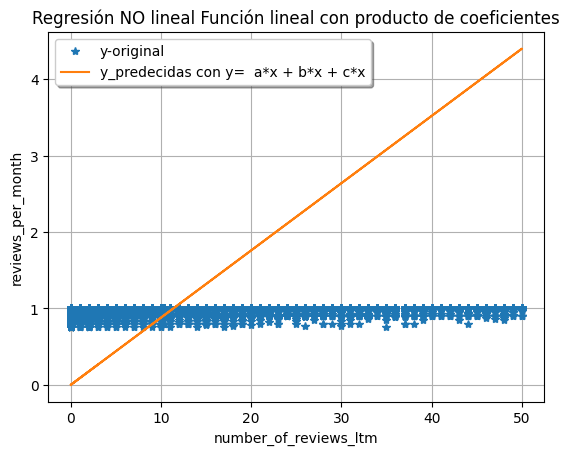

In [245]:
def  func390(x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros390, covs390= curve_fit(func390 , vars_indep_5, var_dep_5)
# Predicciones
y_pred390 = func390(x, *parametros390)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo390= r2_score(y,y_pred390)
#Calculamos el coeficiente de correlacion del modelo
R_390=np.sqrt(R2_Modelo390)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred390, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10

<ipython-input-246-fcfb4594616e>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros400, covs400= curve_fit(func400 , vars_indep_5, var_dep_5)
<ipython-input-246-fcfb4594616e>:11: RuntimeWarning: invalid value encountered in sqrt
  R_400=np.sqrt(R2_Modelo400)


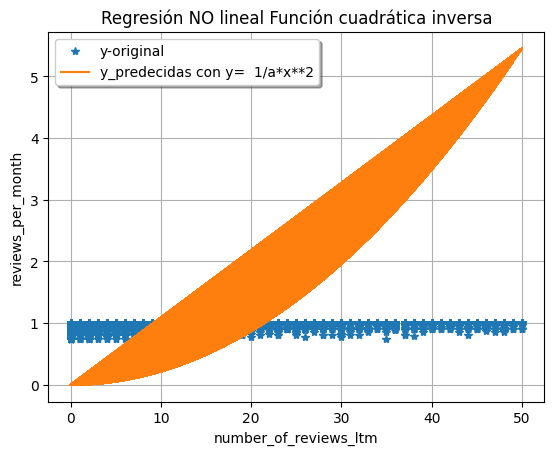

In [246]:
def  func400 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros400, covs400= curve_fit(func400 , vars_indep_5, var_dep_5)
# Predicciones
y_pred400 = func400(x, *parametros400)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo400= r2_score(y,y_pred400)
#Calculamos el coeficiente de correlacion del modelo
R_400=np.sqrt(R2_Modelo400)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred400, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11

<ipython-input-247-35dab248987d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_410=np.sqrt(R2_Modelo410)


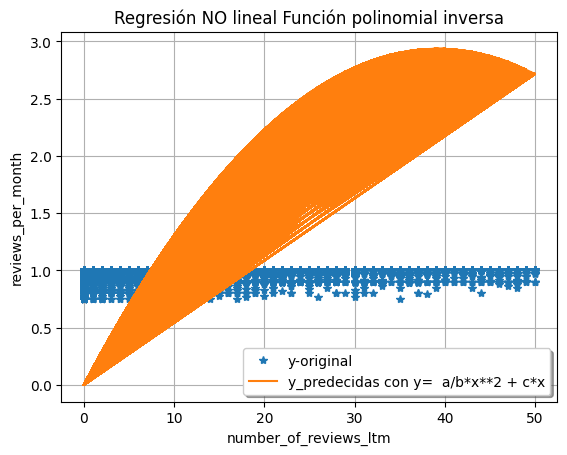

In [247]:
def  func410(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros410, covs410= curve_fit(func410, vars_indep_5, var_dep_5)
# Predicciones
y_pred410 = func410(x, *parametros410)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo410= r2_score(y,y_pred410)
#Calculamos el coeficiente de correlacion del modelo
R_410=np.sqrt(R2_Modelo410)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred410, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Tabla de COEFICIENTES reviews_per_month

In [248]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo310,R2_Modelo320,R2_Modelo330,R2_Modelo340,R2_Modelo350,R2_Modelo360,R2_Modelo370,R2_Modelo390,R2_Modelo400,R2_Modelo410],
    'Coeficiente de Correlación': [R_310,R_320,R_330,R_340,R_350,R_360,R_370,R_390,R_400,R_410]
}

# Generar con llaves
df_coef_mult5 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática','Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult5 = df_coef_mult5.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones reviews_per_month REGRESIÓN NO MULTIPLE\n\n', df_coef_mult5)
print('\nMejor Modelo:\n', df_coef_mult5.iloc[0])

Tabla de correlaciones reviews_per_month REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 5: Función tangencial                                          -87.654181   
Modelo 4: Función senoidal                                           -102.925719   
Modelo 6: Función Valor absoluto                                     -281.310808   
Modelo 2: Función Exponencial                                        -281.523648   
Modelo 1: Función Cuadrática                                         -281.549210   
Modelo 11: Función polinomial inversa                                -460.264692   
Modelo 7: Función cociente entre polinomios                          -478.348992   
Modelo 9: Función lineal con producto de coefic...                   -525.093061   
Modelo 3: Función inversa                                            -525.093065   
Modelo 10: Función cuadrática inversa                                -579.583577   

          

### price

In [250]:
data['price']=data['price']*0.051
data['price'].head()

,price
0,84.2520
1,55.4268
2,55.4268
3,41.5140
4,98.0730


In [251]:
a=corr_factors1.sort_values(by='price', ascending=False).head(7)
a.head()

,room_type,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
price,0.380607,0.009670,0.002018,0.071115,0.012014,0.044000,0.038443,0.051107,0.079703,0.370153,...,0.023546,0.073097,0.080563,0.104414,0.040624,0.033198,0.112116,0.034787,0.034094,0.007573
room_type,1.000000,0.057425,0.025434,0.143308,0.110336,0.024078,0.035912,0.111291,0.041726,0.511978,...,0.224132,0.014486,0.026417,0.024928,0.033348,0.044627,0.017250,0.019089,0.003758,0.179683
accommodates,0.511978,0.044850,0.006936,0.085789,0.064611,0.008030,0.013042,0.084599,0.032688,1.000000,...,0.157138,0.007642,0.027249,0.007179,0.002241,0.024016,0.008263,0.024456,0.009183,0.137452
bedrooms,0.340784,0.000005,0.031265,0.000111,0.022336,0.076040,0.064190,0.012937,0.048461,0.654592,...,0.041158,0.038207,0.042564,0.022314,0.016120,0.027205,0.018927,0.048629,0.090940,0.046726
bathrooms,0.152665,0.005338,0.035678,0.025625,0.008845,0.009880,0.001239,0.003217,0.069808,0.389795,...,0.013189,0.049038,0.046187,0.031215,0.009179,0.013989,0.055119,0.051244,0.009061,0.016022


In [252]:
#Variable Independiente
a5=a.index[1]
a5

'room_type'

In [253]:
vars_indep_6 = data_evaluar[a5]
var_dep_6 = data_evaluar['price']

#### Modelo 1

<ipython-input-254-a8c6b0f97f2a>:10: RuntimeWarning: invalid value encountered in sqrt
  R_420=np.sqrt(R2_Modelo420)


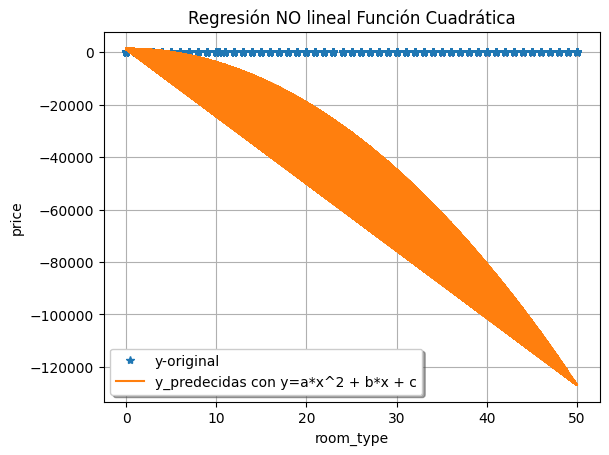

In [254]:
def  func420 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros420, covs420= curve_fit(func420 , vars_indep_6, var_dep_6)
# Predicciones
y_pred420 = func420(x, *parametros420)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo420= r2_score(y,y_pred420)
#Calculamos el coeficiente de correlacion del modelo
R_420=np.sqrt(R2_Modelo420)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred420, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-259-eae5e5d0a182>:11: RuntimeWarning: invalid value encountered in sqrt
  R_430=np.sqrt(R2_Modelo430)


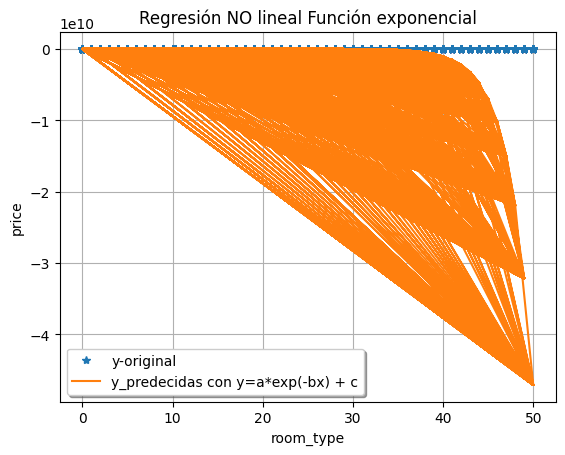

In [259]:
def  func430 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros430, covs430= curve_fit(func430 , vars_indep_6, var_dep_6)
# Predicciones
y_pred430 = func430(x, *parametros430)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo430= r2_score(y,y_pred430)
#Calculamos el coeficiente de correlacion del modelo
R_430=np.sqrt(R2_Modelo430)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred430, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### Modelo 3

<ipython-input-260-93ce6d0b527e>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros440, covs440= curve_fit(func440 , vars_indep_6, var_dep_6)
<ipython-input-260-93ce6d0b527e>:11: RuntimeWarning: invalid value encountered in sqrt
  R_440=np.sqrt(R2_Modelo440)


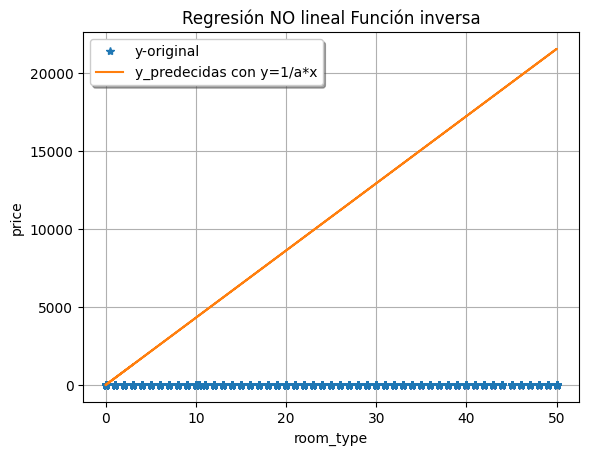

In [260]:
def  func440 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros440, covs440= curve_fit(func440 , vars_indep_6, var_dep_6)
# Predicciones
y_pred440 = func440(x, *parametros440)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo440= r2_score(y,y_pred440)
#Calculamos el coeficiente de correlacion del modelo
R_440=np.sqrt(R2_Modelo440)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred440, label='y_predecidas con y=1/a*x')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4

<ipython-input-261-899fab81d885>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros450, covs450= curve_fit(func450 , vars_indep_6, var_dep_6)
<ipython-input-261-899fab81d885>:11: RuntimeWarning: invalid value encountered in sqrt
  R_450=np.sqrt(R2_Modelo450)


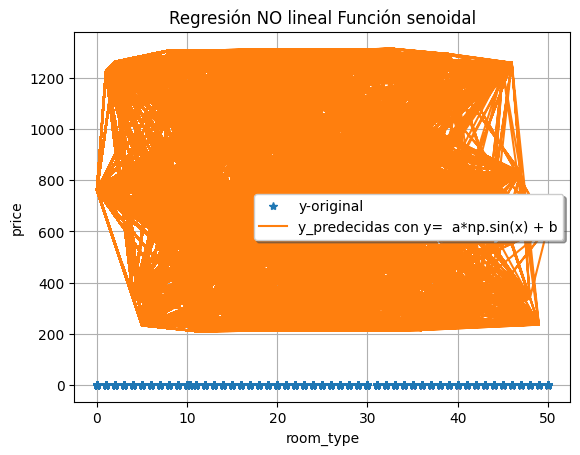

In [261]:
def  func450 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros450, covs450= curve_fit(func450 , vars_indep_6, var_dep_6)
# Predicciones
y_pred450 = func450(x, *parametros450)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo450= r2_score(y,y_pred450)
#Calculamos el coeficiente de correlacion del modelo
R_450=np.sqrt(R2_Modelo450)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred450, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5

<ipython-input-262-911d9545b981>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros460, covs460= curve_fit(func460 , vars_indep_6, var_dep_6)
<ipython-input-262-911d9545b981>:11: RuntimeWarning: invalid value encountered in sqrt
  R_460=np.sqrt(R2_Modelo460)


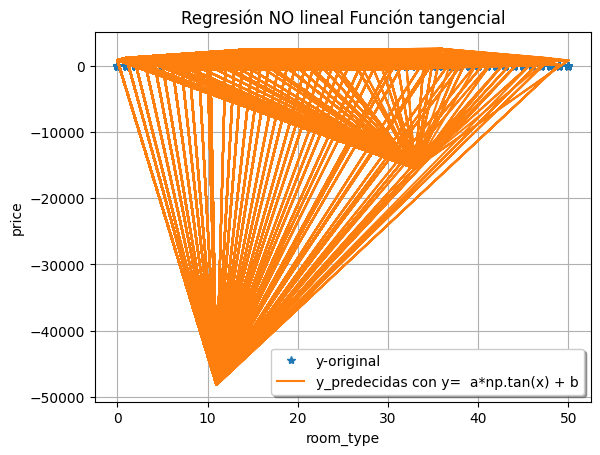

In [262]:
def  func460 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros460, covs460= curve_fit(func460 , vars_indep_6, var_dep_6)
# Predicciones
y_pred460 = func460(x, *parametros460)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo460= r2_score(y,y_pred460)
#Calculamos el coeficiente de correlacion del modelo
R_460=np.sqrt(R2_Modelo460)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred460, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6

<ipython-input-263-ad72d38cf5f9>:11: RuntimeWarning: invalid value encountered in sqrt
  R_470=np.sqrt(R2_Modelo470)


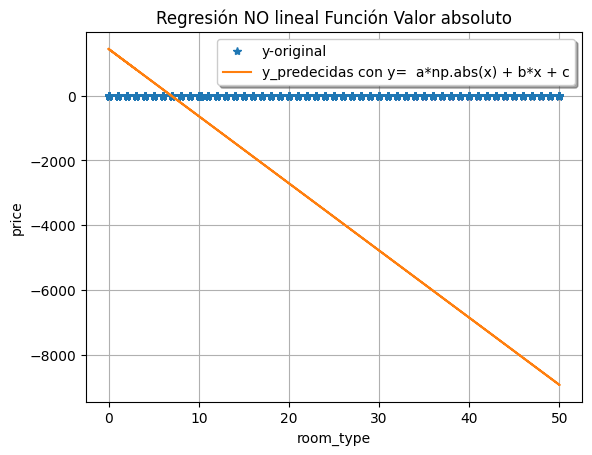

In [263]:
def  func470 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros470, covs470= curve_fit(func470 , vars_indep_6, var_dep_6)
# Predicciones
y_pred470 = func470(x, *parametros470)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo470= r2_score(y,y_pred470)
#Calculamos el coeficiente de correlacion del modelo
R_470=np.sqrt(R2_Modelo470)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred470, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7





<ipython-input-264-32f891e256fc>:11: RuntimeWarning: invalid value encountered in sqrt
  R_480=np.sqrt(R2_Modelo480)


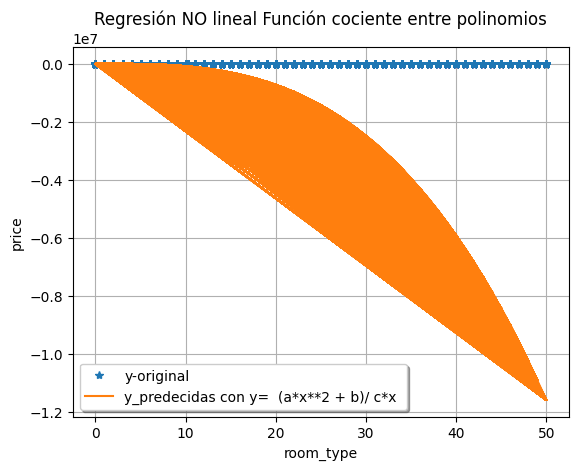

In [264]:
def  func480 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros480, covs480= curve_fit(func480 , vars_indep_6, var_dep_6)
# Predicciones
y_pred480 = func480(x, *parametros480)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo480= r2_score(y,y_pred480)
#Calculamos el coeficiente de correlacion del modelo
R_480=np.sqrt(R2_Modelo480)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred480, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8

In [266]:
#EL MODELO CONTIENE VALORES INFINITOS
'''
def  func490 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros490, covs490= curve_fit(func490 , vars_indep_6, var_dep_6)
# Predicciones
y_pred490 = func490(x, *parametros490)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo490= r2_score(y,y_pred490)
#Calculamos el coeficiente de correlacion del modelo
R_490=np.sqrt(R2_Modelo490)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred490, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
'''

"\ndef  func490 (x, a, b, c):\n     return a*np.log(x) + b\n\n#Ajustamos los parámetros de la función curve_fit\nparametros490, covs490= curve_fit(func490 , vars_indep_6, var_dep_6)\n# Predicciones\ny_pred490 = func490(x, *parametros490)\n#Calculamos el coeficiente de determinación del modelo\nR2_Modelo490= r2_score(y,y_pred490)\n#Calculamos el coeficiente de correlacion del modelo\nR_490=np.sqrt(R2_Modelo490)\n\n#Graficamos las predicciones y los datos originales para realizar la comparación\nplt.plot(x, y, '*', label='y-original')\nplt.plot(x,y_pred490, label='y_predecidas con y=  a*np.log(x) + b ')\nplt.xlabel('room_type')\nplt.ylabel('price')\nplt.title('Regresión NO lineal Función logaritmica')\nplt.legend(loc='best',fancybox=True, shadow=True)\nplt.grid(True)\nplt.show() \n"

#### Modelo 9

<ipython-input-267-89d556474c1d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_500=np.sqrt(R2_Modelo500)


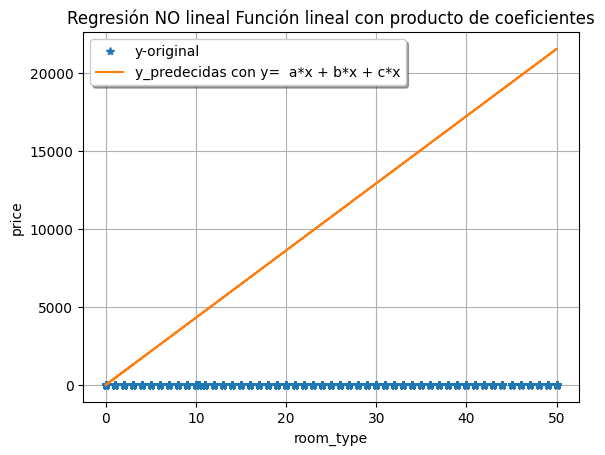

In [267]:
def  func500 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros500, covs500= curve_fit(func500 , vars_indep_6, var_dep_6)
# Predicciones
y_pred500 = func500(x, *parametros500)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo500= r2_score(y,y_pred500)
#Calculamos el coeficiente de correlacion del modelo
R_500=np.sqrt(R2_Modelo500)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred500, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10

<ipython-input-268-59c41171b1ee>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros510, covs510= curve_fit(func510 , vars_indep_6, var_dep_6)
<ipython-input-268-59c41171b1ee>:11: RuntimeWarning: invalid value encountered in sqrt
  R_510=np.sqrt(R2_Modelo510)


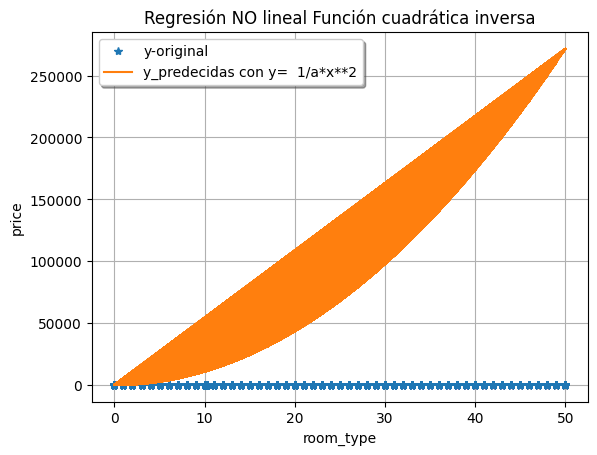

In [268]:
def  func510 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros510, covs510= curve_fit(func510 , vars_indep_6, var_dep_6)
# Predicciones
y_pred510 = func510(x, *parametros510)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo510= r2_score(y,y_pred510)
#Calculamos el coeficiente de correlacion del modelo
R_510=np.sqrt(R2_Modelo510)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred510, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11

<ipython-input-269-c7c5933a551e>:11: RuntimeWarning: invalid value encountered in sqrt
  R_520=np.sqrt(R2_Modelo520)


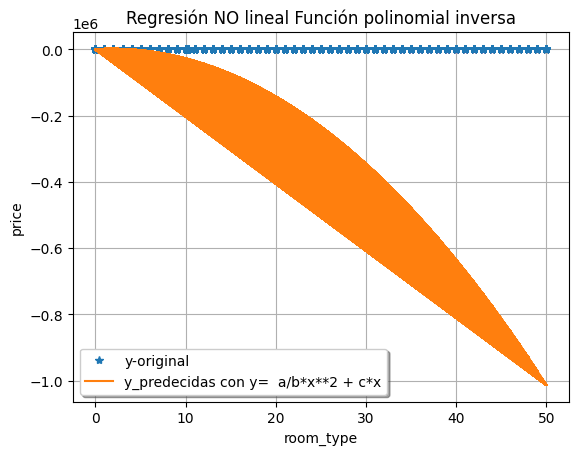

In [269]:
def  func520(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros520, covs520= curve_fit(func520, vars_indep_6, var_dep_6)
# Predicciones
y_pred520 = func520(x, *parametros520)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo520= r2_score(y,y_pred520)
#Calculamos el coeficiente de correlacion del modelo
R_520=np.sqrt(R2_Modelo520)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred520, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Tabla de COEFICIENTES price

In [273]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo420,R2_Modelo430,R2_Modelo440,R2_Modelo450,R2_Modelo460,R2_Modelo470,R2_Modelo480,R2_Modelo500,R2_Modelo510,R2_Modelo520],
    'Coeficiente de Correlación': [R_420,R_430,R_440,R_450,R_460,R_470,R_480,R_500,R_510,R_520]
}

# Generar con llaves
df_coef_mult6 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática','Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult6 = df_coef_mult6.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones price REGRESIÓN NO MULTIPLE\n\n', df_coef_mult6)
print('\nMejor Modelo:\n', df_coef_mult6.iloc[0])

Tabla de correlaciones price REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 4: Función senoidal                                         -3.261913e+08   
Modelo 6: Función Valor absoluto                                   -3.197365e+09   
Modelo 5: Función tangencial                                       -1.851315e+10   
Modelo 3: Función inversa                                          -2.165911e+10   
Modelo 9: Función lineal con producto de coefic...                 -2.165911e+10   
Modelo 1: Función Cuadrática                                       -3.492987e+11   
Modelo 10: Función cuadrática inversa                              -1.635587e+12   
Modelo 11: Función polinomial inversa                              -2.148479e+13   
Modelo 7: Función cociente entre polinomios                        -1.917685e+15   
Modelo 2: Función Exponencial                                      -5.818893e+21   

                      